# Ejercicios Análisis Preliminar


## 1. Cargar los datos de trainmod.

In [260]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

analisis de comparion
https://www.kaggle.com/code/mariusborel/eda-electric-vehicle-spec-2025#Data-loading-nd-overview

# 1.- Carga del dato

In [261]:

#1. Cargar los datos de trainmod (Los creados en el apartado anterior).
df = pd.read_csv(r"C:\americo\ia_dema\z-ejercicios_kaggle\electric_vehicles_spec_2025.csv",sep=",",encoding='latin-1')

### Conocer las filas y columnas de la tabla

El atributo df.shape te devuelve un tuple (n_filas, n_columnas) y sirve para:

🧮 Conocer rápido el tamaño del DataFrame (número total de registros y variables).

🔍 Validar que la carga y limpieza de datos mantenga (o cambie) el número esperado de filas/columnas.

🛠️ Ajustar bucles o particiones: for i in range(df.shape[0]) o al dividir el dataset en train/test.

📊 Documentar tu EDA: “Empezamos con 10 000×20 y, tras eliminar duplicados y nulos, quedamos en 9 500×18”.

In [262]:
print(df.shape)          # e.g. (10000, 20)
n_rows, n_cols = df.shape
print(f"Filas: {n_rows} — Columnas: {n_cols}")

(478, 22)
Filas: 478 — Columnas: 22


## 2. Mostrar los datos.


In [263]:
print("=== head() ===")

df.head()

=== head() ===


brand                model  top_speed_kmh  battery_capacity_kWh  \
0  Abarth     500e Convertible            155                  37.8   
1  Abarth       500e Hatchback            155                  37.8   
2  Abarth  600e Scorpionissima            200                  50.8   
3  Abarth         600e Turismo            200                  50.8   
4  Aiways                   U5            150                  60.0   

  battery_type  number_of_cells  torque_nm  efficiency_wh_per_km  range_km  \
0  Lithium-ion            192.0      235.0                   156       225   
1  Lithium-ion            192.0      235.0                   149       225   
2  Lithium-ion            102.0      345.0                   158       280   
3  Lithium-ion            102.0      345.0                   158       280   
4  Lithium-ion              NaN      310.0                   156       315   

   acceleration_0_100_s  ...  towing_capacity_kg cargo_volume_l  seats  \
0                   7.0  ...                 0.0            185      4   
1                   7.0  ...                 0.0            185      4   
2                   5.9  ...                 0.0            360      5   
3                   6.2  ...                 0.0            360      5   
4                   7.5  ...                 NaN            496      5   

  drivetrain       segment length_mm width_mm  height_mm  car_body_type  \
0        FWD   B - Compact      3673     1683       1518      Hatchback   
1        FWD   B - Compact      3673     1683       1518      Hatchback   
2        FWD  JB - Compact      4187     1779       1557            SUV   
3        FWD  JB - Compact      4187     1779       1557            SUV   
4        FWD   JC - Medium      4680     1865       1700            SUV   

                                          source_url  
0  https://ev-database.org/car/1904/Abarth-500e-C...  
1  https://ev-database.org/car/1903/Abarth-500e-H...  
2  https://ev-database.org/car/3057/Abarth-600e-S...  
3  https://ev-database.org/car/3056/Abarth-600e-T...  
4         https://ev-database.org/car/1678/Aiways-U5  

[5 rows x 22 columns]

In [264]:
print("\n=== info() ===")
df.info()


=== info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non

## 3. Realizar un resumen estadístico de los datos y realizar una interpretación.


In [265]:
df.dtypes.value_counts().rename_axis('dtype').reset_index(name='n_columnas')

dtype  n_columnas
0   object           9
1    int64           7
2  float64           6

###    .describe

    Por defecto describe() solo resume las columnas numéricas.

###    include='all'

    Con include='all' le indicas que muestre estadísticas de todas las columnas, incluidas las de tipo objeto (strings), categorías, fechas…

    Así obtienes, además de media y cuantiles, conteo de valores únicos, el valor más frecuente (top) y su frecuencia (freq) para columnas no numéricas.

###    .T

    Es el transpose (transposición). Cambia filas ↔ columnas en el DataFrame resultante.

    Hace que cada estadístico (count, mean, unique, top…) sea una fila y cada columna de tu dataset sea una columna.

    Facilita la lectura cuando tienes pocas columnas pero muchos estadísticos, o quieres exportar resultados orientados por variable.

In [266]:
print("\n=== describe().T ===")
df.describe().T


=== describe().T ===


count         mean          std     min     25%  \
top_speed_kmh              478.0   185.487448    34.252773   125.0   160.0   
battery_capacity_kWh       478.0    74.043724    20.331058    21.3    60.0   
number_of_cells            276.0   485.293478  1210.819733    72.0   150.0   
torque_nm                  471.0   498.012739   241.461128   113.0   305.0   
efficiency_wh_per_km       478.0   162.903766    34.317532   109.0   143.0   
range_km                   478.0   393.179916   103.287335   135.0   320.0   
acceleration_0_100_s       478.0     6.882636     2.730696     2.2     4.8   
fast_charging_power_kw_dc  477.0   125.008386    58.205012    29.0    80.0   
towing_capacity_kg         452.0  1052.261062   737.851774     0.0   500.0   
seats                      478.0     5.263598     1.003961     2.0     5.0   
length_mm                  478.0  4678.506276   369.210573  3620.0  4440.0   
width_mm                   478.0  1887.359833    73.656807  1610.0  1849.0   
height_mm                  478.0  1601.125523   130.754851  1329.0  1514.0   

                               50%      75%     max  
top_speed_kmh               180.00   201.00   325.0  
battery_capacity_kWh         76.15    90.60   118.0  
number_of_cells             216.00   324.00  7920.0  
torque_nm                   430.00   679.00  1350.0  
efficiency_wh_per_km        155.00   177.75   370.0  
range_km                    397.50   470.00   685.0  
acceleration_0_100_s          6.60     8.20    19.1  
fast_charging_power_kw_dc   113.00   150.00   281.0  
towing_capacity_kg         1000.00  1600.00  2500.0  
seats                         5.00     5.00     9.0  
length_mm                  4720.00  4961.00  5908.0  
width_mm                   1890.00  1939.00  2080.0  
height_mm                  1596.00  1665.00  1986.0

In [267]:
print("\n=== describe(include='all') ===")
df.describe(include='all')


=== describe(include='all') ===


brand             model  top_speed_kmh  battery_capacity_kWh  \
count             478               477     478.000000            478.000000   
unique             59               477            NaN                   NaN   
top     Mercedes-Benz  500e Convertible            NaN                   NaN   
freq               42                 1            NaN                   NaN   
mean              NaN               NaN     185.487448             74.043724   
std               NaN               NaN      34.252773             20.331058   
min               NaN               NaN     125.000000             21.300000   
25%               NaN               NaN     160.000000             60.000000   
50%               NaN               NaN     180.000000             76.150000   
75%               NaN               NaN     201.000000             90.600000   
max               NaN               NaN     325.000000            118.000000   

       battery_type  number_of_cells    torque_nm  efficiency_wh_per_km  \
count           478       276.000000   471.000000            478.000000   
unique            1              NaN          NaN                   NaN   
top     Lithium-ion              NaN          NaN                   NaN   
freq            478              NaN          NaN                   NaN   
mean            NaN       485.293478   498.012739            162.903766   
std             NaN      1210.819733   241.461128             34.317532   
min             NaN        72.000000   113.000000            109.000000   
25%             NaN       150.000000   305.000000            143.000000   
50%             NaN       216.000000   430.000000            155.000000   
75%             NaN       324.000000   679.000000            177.750000   
max             NaN      7920.000000  1350.000000            370.000000   

          range_km  acceleration_0_100_s  ...  towing_capacity_kg  \
count   478.000000            478.000000  ...          452.000000   
unique         NaN                   NaN  ...                 NaN   
top            NaN                   NaN  ...                 NaN   
freq           NaN                   NaN  ...                 NaN   
mean    393.179916              6.882636  ...         1052.261062   
std     103.287335              2.730696  ...          737.851774   
min     135.000000              2.200000  ...            0.000000   
25%     320.000000              4.800000  ...          500.000000   
50%     397.500000              6.600000  ...         1000.000000   
75%     470.000000              8.200000  ...         1600.000000   
max     685.000000             19.100000  ...         2500.000000   

       cargo_volume_l       seats drivetrain      segment    length_mm  \
count             477  478.000000        478          478   478.000000   
unique            140         NaN          3           15          NaN   
top               520         NaN        AWD  JC - Medium          NaN   
freq               17         NaN        191           91          NaN   
mean              NaN    5.263598        NaN          NaN  4678.506276   
std               NaN    1.003961        NaN          NaN   369.210573   
min               NaN    2.000000        NaN          NaN  3620.000000   
25%               NaN    5.000000        NaN          NaN  4440.000000   
50%               NaN    5.000000        NaN          NaN  4720.000000   
75%               NaN    5.000000        NaN          NaN  4961.000000   
max               NaN    9.000000        NaN          NaN  5908.000000   

           width_mm    height_mm  car_body_type  \
count    478.000000   478.000000            478   
unique          NaN          NaN              8   
top             NaN          NaN            SUV   
freq            NaN          NaN            244   
mean    1887.359833  1601.125523            NaN   
std       73.656807   130.754851            NaN   
min     1610.000000  1329.000000            NaN   
25%     1849.000000  1514.00

enontramos las columnas con falta de informacion y/o Nan

In [268]:
# Supongamos que ya has cargado tu DataFrame en df
n_rows = len(df)
n_rows

478

In [269]:

# 1. Contar valores no nulos por columna
non_null_counts = df.count()
non_null_counts

brand                        478
model                        477
top_speed_kmh                478
battery_capacity_kWh         478
battery_type                 478
number_of_cells              276
torque_nm                    471
efficiency_wh_per_km         478
range_km                     478
acceleration_0_100_s         478
fast_charging_power_kw_dc    477
fast_charge_port             477
towing_capacity_kg           452
cargo_volume_l               477
seats                        478
drivetrain                   478
segment                      478
length_mm                    478
width_mm                     478
height_mm                    478
car_body_type                478
source_url                   478
dtype: int64

In [270]:

# 2. Filtrar columnas cuyo conteo de no-nulos sea menor al número total de filas
incomplete = non_null_counts[ non_null_counts < n_rows ]
incomplete

model                        477
number_of_cells              276
torque_nm                    471
fast_charging_power_kw_dc    477
fast_charge_port             477
towing_capacity_kg           452
cargo_volume_l               477
dtype: int64

In [271]:

print("Columnas con datos incompletos (Non-Null Count < total filas):\n")
for col, cnt in incomplete.items():
    pct = cnt / n_rows * 100
    print(f"– {col}: {cnt} non-null de {n_rows} ({pct:.1f}%)")


Columnas con datos incompletos (Non-Null Count < total filas):

– model: 477 non-null de 478 (99.8%)
– number_of_cells: 276 non-null de 478 (57.7%)
– torque_nm: 471 non-null de 478 (98.5%)
– fast_charging_power_kw_dc: 477 non-null de 478 (99.8%)
– fast_charge_port: 477 non-null de 478 (99.8%)
– towing_capacity_kg: 452 non-null de 478 (94.6%)
– cargo_volume_l: 477 non-null de 478 (99.8%)


In [272]:

# 3. Si quieres un DataFrame de resumen:
# Obtener el dtype de cada columna
dtypes = df.dtypes[incomplete.index]

# Crear el DataFrame de resumen con el dtype incluido
incomplete_df = pd.DataFrame({
    'dtype':      dtypes,  # Tipo de dato de la columna
    'non_null':   incomplete,  # Cantidad de valores no nulos
    'null_count': n_rows - incomplete,  # Cantidad de valores nulos
    'null_pct':   (n_rows - incomplete) / n_rows * 100  # Porcentaje de valores nulos
})

print("\nResumen en DataFrame:\n", incomplete_df)



Resumen en DataFrame:
                              dtype  non_null  null_count   null_pct
model                       object       477           1   0.209205
number_of_cells            float64       276         202  42.259414
torque_nm                  float64       471           7   1.464435
fast_charging_power_kw_dc  float64       477           1   0.209205
fast_charge_port            object       477           1   0.209205
towing_capacity_kg         float64       452          26   5.439331
cargo_volume_l              object       477           1   0.209205


#### otra manera


In [273]:
# 2.1 Conteo de nulos por columna
missing_counts = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_counts)


Valores faltantes por columna:
 brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64


In [274]:

# 2.2 Filtrar columnas que tengan al menos un nulo
# Filtrar columnas que tengan al menos un nulo
cols_with_null = missing_counts[missing_counts > 0]

# Obtener el dtype de cada columna con nulos
cols_with_null_dtype = df[cols_with_null.index].dtypes

# Mostrar columnas con nulos y sus tipos de datos
print("\nColumnas con nulos y sus tipos de datos:\n")
print(pd.DataFrame({'Missing Values': cols_with_null, 'Dtype': cols_with_null_dtype}))





Columnas con nulos y sus tipos de datos:

                           Missing Values    Dtype
model                                   1   object
number_of_cells                       202  float64
torque_nm                               7  float64
fast_charging_power_kw_dc               1  float64
fast_charge_port                        1   object
towing_capacity_kg                     26  float64
cargo_volume_l                          1   object


In [275]:

# 2.4 Filas que contienen al menos un valor nulo
rows_with_null = df[df.isnull().any(axis=1)]
print(f"\nNúmero de filas con al menos un nulo: {len(rows_with_null)}")


Número de filas con al menos un nulo: 214


In [276]:
""" df_num = df.select_dtypes(include=[np.number])
df_num = df[df.describe().columns]
"""

df_num = df.select_dtypes(include=[np.number])
df_num 

top_speed_kmh  battery_capacity_kWh  number_of_cells  torque_nm  \
0              155                  37.8            192.0      235.0   
1              155                  37.8            192.0      235.0   
2              200                  50.8            102.0      345.0   
3              200                  50.8            102.0      345.0   
4              150                  60.0              NaN      310.0   
..             ...                   ...              ...        ...   
473            210                  71.0              NaN      440.0   
474            190                  49.0              NaN      343.0   
475            190                  65.0              NaN      343.0   
476            190                  65.0              NaN      543.0   
477            150                  41.2            112.0      200.0   

     efficiency_wh_per_km  range_km  acceleration_0_100_s  \
0                     156       225                   7.0   
1                     149       225                   7.0   
2                     158       280                   5.9   
3                     158       280                   6.2   
4                     156       315                   7.5   
..                    ...       ...                   ...   
473                   148       365                   6.0   
474                   148       265                   5.9   
475                   146       360                   5.6   
476                   153       350                   3.8   
477                   125       250                   8.1   

     fast_charging_power_kw_dc  towing_capacity_kg  seats  length_mm  \
0                         67.0                 0.0      4       3673   
1                         67.0                 0.0      4       3673   
2                         79.0                 0.0      5       4187   
3                         79.0                 0.0      5       4187   
4                         78.0                 NaN      5       4680   
..                         ...                 ...    ...        ...   
473                      240.0              2000.0      5       4787   
474                       70.0              1600.0      5       4432   
475                      114.0              1600.0      5       4432   
476                      114.0              1600.0      5       4432   
477                       65.0                 0.0      5       4003   

     width_mm  height_mm  
0        1683       1518  
1        1683       1518  
2        1779       1557  
3        1779       1557  
4        1865       1700  
..        ...        ...  
473      1930       1650  
474      1836       1566  
475      1836       1566  
476      1836       1566  
477      1885       1557  

[478 rows x 13 columns]

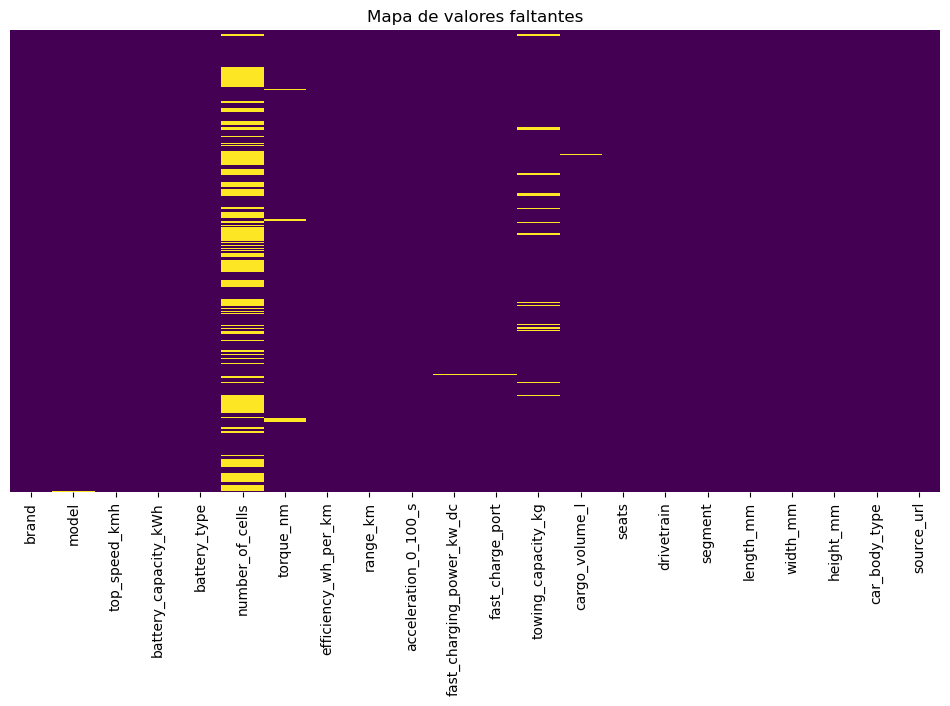

In [277]:

# ————————————————————————————
# 🕵️‍♂️ 2. Detección de valores faltantes
# ————————————————————————————
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), 
            cbar=False, 
            yticklabels=False, 
            cmap='viridis')
plt.title('Mapa de valores faltantes')
plt.show()

In [278]:

#1. Cargar los datos de trainmod (Los creados en el apartado anterior).
df = pd.read_csv(r"C:\americo\ia_dema\z-ejercicios_kaggle\electric_vehicles_spec_2025.csv",sep=",",encoding='latin-1')

In [279]:
# 3.2 Imputar valores numéricos con la mediana

# Identificamos automáticamente qué columnas numéricas tienen nulos
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("-----selecciona los campos dtypes int64 y float64-----")
num_cols


-----selecciona los campos dtypes int64 y float64-----


Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')

In [280]:


num_with_null = [c for c in num_cols if df[c].isnull().any()]
print("-----lista de nombres de columnas numéricas null-----")
num_with_null



-----lista de nombres de columnas numéricas null-----


['number_of_cells',
 'torque_nm',
 'fast_charging_power_kw_dc',
 'towing_capacity_kg']

In [281]:
# Imputar valores nulos en columnas numéricas con la mediana
for col in num_with_null:
    med = df[col].median()  # Calcular la mediana de la columna
    #df[col].fillna(med, inplace=True) esta obsoleto
    df[col] = df[col].fillna(med)  # Asignar la columna imputada correctamente
    print(f"→ {col}: imputados {df[col].isnull().sum()} nulos con mediana {med}")


→ number_of_cells: imputados 0 nulos con mediana 216.0
→ torque_nm: imputados 0 nulos con mediana 430.0
→ fast_charging_power_kw_dc: imputados 0 nulos con mediana 113.0
→ towing_capacity_kg: imputados 0 nulos con mediana 1000.0


In [282]:
df.isnull().sum()

brand                        0
model                        1
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             1
towing_capacity_kg           0
cargo_volume_l               1
seats                        0
drivetrain                   0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
dtype: int64

In [283]:

# 3.3 Imputar valores categóricos con la moda

# Identificamos columnas “object” o “category” con nulos
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("-----selecciona las columnas object o category null-----")
cat_cols


-----selecciona las columnas object o category null-----


Index(['brand', 'model', 'battery_type', 'fast_charge_port', 'cargo_volume_l',
       'drivetrain', 'segment', 'car_body_type', 'source_url'],
      dtype='object')

In [284]:

print("-----lista de nombres de columnas categóricas-----")
cat_with_null = [c for c in cat_cols if df[c].isnull().any()]
cat_with_null

-----lista de nombres de columnas categóricas-----


['model', 'fast_charge_port', 'cargo_volume_l']

In [285]:
print("-----")
# Imputar valores nulos en columnas categóricas con la moda
for col in cat_with_null:
    mode = df[col].mode()[0]  # Obtener la moda de la columna
    df[col] = df[col].fillna(mode)  # Asignar la columna imputada correctamente
    print(f"→ {col}: imputados {df[col].isnull().sum()} nulos con moda '{mode}'")


-----
→ model: imputados 0 nulos con moda '#1 Brabus'
→ fast_charge_port: imputados 0 nulos con moda 'CCS'
→ cargo_volume_l: imputados 0 nulos con moda '520'


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      478 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            478 non-null    float64
 6   torque_nm                  478 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  478 non-null    float64
 11  fast_charge_port           478 non-null    object 
 12  towing_capacity_kg         478 non-null    float64
 13  cargo_volume_l             478 non-null    object 

## 4. Determinar las categorías existentes

    - lo podemos hacer de tres maneras:
      - .unique()
      - .value_counts()
      - .describe()


In [287]:
# Filtrar columnas con dtype 'object'
object_columns = df.select_dtypes(include=['object'])

# Mostrar las columnas agrupadas
print("\n=== Columnas con dtype 'object' ===\n")
print(object_columns.info())


=== Columnas con dtype 'object' ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brand             478 non-null    object
 1   model             478 non-null    object
 2   battery_type      478 non-null    object
 3   fast_charge_port  478 non-null    object
 4   cargo_volume_l    478 non-null    object
 5   drivetrain        478 non-null    object
 6   segment           478 non-null    object
 7   car_body_type     478 non-null    object
 8   source_url        478 non-null    object
dtypes: object(9)
memory usage: 33.7+ KB
None


In [288]:
df["brand"].unique()

array(['Abarth', 'Aiways', 'Alfa', 'Alpine', 'Audi', 'BMW', 'BYD',
       'CUPRA', 'Cadillac', 'Citroen', 'DS', 'Dacia', 'Dongfeng',
       'Elaris', 'Fiat', 'Ford', 'GWM', 'Genesis', 'Honda', 'Hongqi',
       'Hyundai', 'Jaguar', 'Jeep', 'KGM', 'Kia', 'Lancia', 'Leapmotor',
       'Lexus', 'Lotus', 'Lucid', 'Lynk&Co', 'MG', 'Maserati', 'Maxus',
       'Mazda', 'Mercedes-Benz', 'Mini', 'NIO', 'Nissan', 'Omoda', 'Opel',
       'Peugeot', 'Polestar', 'Porsche', 'Renault', 'Rolls-Royce',
       'Skoda', 'Skywell', 'Smart', 'Subaru', 'Tesla', 'Toyota',
       'VinFast', 'Volkswagen', 'Volvo', 'Voyah', 'XPENG', 'Zeekr',
       'firefly'], dtype=object)

In [289]:
df_marca = df["brand"].describe()
print("--------describe unicas--------")
print(df_marca)
print("----------------")
print("--------marcas unicas--------")
df_marca_unicas = df["brand"].unique()
print(df_marca_unicas)
print("----------------")
print("--------total marcas agrupadas--------")
df["brand"].groupby(df["brand"]).count().sort_values(ascending=False)

--------describe unicas--------
count               478
unique               59
top       Mercedes-Benz
freq                 42
Name: brand, dtype: object
----------------
--------marcas unicas--------
['Abarth' 'Aiways' 'Alfa' 'Alpine' 'Audi' 'BMW' 'BYD' 'CUPRA' 'Cadillac'
 'Citroen' 'DS' 'Dacia' 'Dongfeng' 'Elaris' 'Fiat' 'Ford' 'GWM' 'Genesis'
 'Honda' 'Hongqi' 'Hyundai' 'Jaguar' 'Jeep' 'KGM' 'Kia' 'Lancia'
 'Leapmotor' 'Lexus' 'Lotus' 'Lucid' 'Lynk&Co' 'MG' 'Maserati' 'Maxus'
 'Mazda' 'Mercedes-Benz' 'Mini' 'NIO' 'Nissan' 'Omoda' 'Opel' 'Peugeot'
 'Polestar' 'Porsche' 'Renault' 'Rolls-Royce' 'Skoda' 'Skywell' 'Smart'
 'Subaru' 'Tesla' 'Toyota' 'VinFast' 'Volkswagen' 'Volvo' 'Voyah' 'XPENG'
 'Zeekr' 'firefly']
----------------
--------total marcas agrupadas--------


brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             22
BMW              20
Peugeot          19
Volvo            18
BYD              17
Smart            17
Kia              16
Opel             14
Hyundai          14
Skoda            12
MG               12
NIO              12
Citroen          12
Renault          11
Tesla            11
Polestar          9
XPENG             9
Zeekr             9
Fiat              8
Mini              8
Toyota            7
Nissan            6
Lotus             6
GWM               6
Genesis           5
DS                5
CUPRA             5
Abarth            4
Lucid             3
Hongqi            3
Maserati          3
Lexus             3
Alfa              2
Aiways            2
Alpine            2
Leapmotor         2
Jeep              2
Dacia             2
VinFast           2
Mazda             2
Skywell           2
Dongfeng          2
Elaris            1
Voyah             1
Cadillac          1
Maxus         

In [290]:
df_drivetrain = df["drivetrain"].describe()
print("--------describe drivetrain--------")
print(df_drivetrain)
print("----------------")
print("--------unicos en drivetrain--------")
df_drivetrain_unicas = df["drivetrain"].unique()
print(df_drivetrain_unicas)
print("----------------")
print("--------agrupacion drivetrain--------")
df["drivetrain"].groupby(df["drivetrain"]).count().sort_values(ascending=False)

--------describe drivetrain--------
count     478
unique      3
top       AWD
freq      191
Name: drivetrain, dtype: object
----------------
--------unicos en drivetrain--------
['FWD' 'RWD' 'AWD']
----------------
--------agrupacion drivetrain--------


drivetrain
AWD    191
FWD    156
RWD    131
Name: drivetrain, dtype: int64

In [291]:
df_segment = df["segment"].describe()
print("--------segmentn--------")
print(df_segment)
print("----------------")
df_segment_unicas = df["segment"].unique()
print(df_segment_unicas)
print("----------------")
df["segment"].groupby(df["segment"]).count().sort_values(ascending=False)

--------segmentn--------
count             478
unique             15
top       JC - Medium
freq               91
Name: segment, dtype: object
----------------
['B - Compact' 'JB - Compact' 'JC - Medium' 'JE - Executive' 'JD - Large'
 'F - Luxury' 'D - Large' 'E - Executive' 'C - Medium' 'JF - Luxury'
 'N - Passenger Van' 'A - Mini' 'JA - Mini' 'G - Sports' 'I - Luxury']
----------------


segment
JC - Medium          91
JD - Large           58
F - Luxury           51
N - Passenger Van    47
JB - Compact         44
C - Medium           34
E - Executive        30
JF - Luxury          30
B - Compact          29
D - Large            28
JE - Executive       28
A - Mini              3
G - Sports            2
JA - Mini             2
I - Luxury            1
Name: segment, dtype: int64

In [292]:
df_fast_charge_port = df["fast_charge_port"].describe()
print("--------describe fast_charge_port--------")
print(df_fast_charge_port)
print("----------------")
print("--------unicos en fast_charge_port--------")
df_fast_charge_port_unicas = df["fast_charge_port"].unique()
print(df_fast_charge_port_unicas)
print("----------------")
print("--------agrupacion fast_charge_port--------")
df["fast_charge_port"].groupby(df["fast_charge_port"]).count().sort_values(ascending=False)



--------describe fast_charge_port--------
count     478
unique      2
top       CCS
freq      477
Name: fast_charge_port, dtype: object
----------------
--------unicos en fast_charge_port--------
['CCS' 'CHAdeMO']
----------------
--------agrupacion fast_charge_port--------


fast_charge_port
CCS        477
CHAdeMO      1
Name: fast_charge_port, dtype: int64

In [293]:
df_car_body_type = df["car_body_type"].describe()
print("--------describe car_body_type--------")
print(df_car_body_type)
print("----------------")
print("--------unicos en car_body_type--------")
df_car_body_type = df["car_body_type"].unique()
print(df_car_body_type)
print("----------------")
print("--------agrupacion car_body_type--------")
df["car_body_type"].groupby(df["car_body_type"]).count().sort_values(ascending=False)




--------describe car_body_type--------
count     478
unique      8
top       SUV
freq      244
Name: car_body_type, dtype: object
----------------
--------unicos en car_body_type--------
['Hatchback' 'SUV' 'Station/Estate' 'Liftback Sedan' 'Sedan'
 'Small Passenger Van' 'Cabriolet' 'Coupe']
----------------
--------agrupacion car_body_type--------


car_body_type
SUV                    244
Sedan                   63
Hatchback               57
Small Passenger Van     47
Liftback Sedan          33
Station/Estate          27
Cabriolet                5
Coupe                    2
Name: car_body_type, dtype: int64

## 7. Realizar un gráfico

In [294]:
df.dtypes.value_counts().rename_axis('dtype').reset_index(name='n_columnas')

dtype  n_columnas
0   object           9
1    int64           7
2  float64           6

In [295]:
df.head(10)

brand                                 model  top_speed_kmh  \
0  Abarth                      500e Convertible            155   
1  Abarth                        500e Hatchback            155   
2  Abarth                   600e Scorpionissima            200   
3  Abarth                          600e Turismo            200   
4  Aiways                                    U5            150   
5  Aiways                                    U6            160   
6    Alfa         Romeo Junior Elettrica 54 kWh            150   
7    Alfa  Romeo Junior Elettrica 54 kWh Veloce            200   
8  Alpine                  A290 Electric 180 hp            160   
9  Alpine                  A290 Electric 220 hp            170   

   battery_capacity_kWh battery_type  number_of_cells  torque_nm  \
0                  37.8  Lithium-ion            192.0      235.0   
1                  37.8  Lithium-ion            192.0      235.0   
2                  50.8  Lithium-ion            102.0      345.0   
3                  50.8  Lithium-ion            102.0      345.0   
4                  60.0  Lithium-ion            216.0      310.0   
5                  60.0  Lithium-ion            216.0      315.0   
6                  50.8  Lithium-ion            102.0      260.0   
7                  50.8  Lithium-ion            102.0      345.0   
8                  52.0  Lithium-ion            184.0      285.0   
9                  52.0  Lithium-ion            184.0      300.0   

   efficiency_wh_per_km  range_km  acceleration_0_100_s  ...  \
0                   156       225                   7.0  ...   
1                   149       225                   7.0  ...   
2                   158       280                   5.9  ...   
3                   158       280                   6.2  ...   
4                   156       315                   7.5  ...   
5                   150       350                   7.0  ...   
6                   128       320                   9.0  ...   
7                   164       310                   6.0  ...   
8                   138       310                   7.4  ...   
9                   144       305                   6.4  ...   

   towing_capacity_kg cargo_volume_l  seats drivetrain       segment  \
0                 0.0            185      4        FWD   B - Compact   
1                 0.0            185      4        FWD   B - Compact   
2                 0.0            360      5        FWD  JB - Compact   
3                 0.0            360      5        FWD  JB - Compact   
4              1000.0            496      5        FWD   JC - Medium   
5              1000.0            472      5        FWD   JC - Medium   
6                 0.0            400      5        FWD  JB - Compact   
7                 0.0            400      5        FWD  JB - Compact   
8               500.0            326      5        FWD   B - Compact   
9               500.0            326      5        FWD   B - Compact   

  length_mm width_mm  height_mm  car_body_type  \
0      3673     1683       1518      Hatchback   
1      3673     1683       1518      Hatchback   
2      4187     1779       1557            SUV   
3      4187     1779       1557            SUV   
4      4680     1865       1700            SUV   
5      4805     1880       1641            SUV   
6      4173     1781       1532            SUV   
7      4173     1781       1505            SUV   
8      3997     1823       1512      Hatchback   
9      3997     1823       1512      Hatchback   

                                          source_url  
0  https://ev-database.org/car/1904/Abarth-500e-C...  
1  https://ev-database.org/car/1903/Abarth-500e-H...  
2  https://ev-database.org/car/3057/Abarth-600e-S...  
3  https://ev-database.org/car/3056/Abarth-600e-T...  
4         https://ev-database.org/car/1678/Aiways-U5  
5         https://ev-database.org/car/1766/Aiways-U6  
6  https://ev-database.org/car/2184/Alfa-Romeo-Ju...  
7  https://ev-database.org/car/2185/Alf

1.  Histograma de Distribución 
   - Muestra la frecuencia de valores de una variable numérica
   - Te ayuda a ver asimetrías, moda y posibles sesgos.

<Axes: >

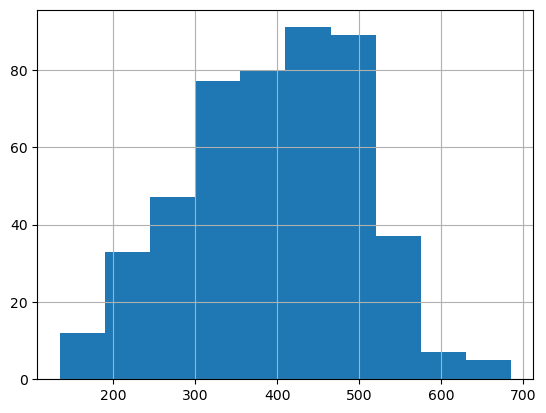

In [296]:
df['range_km'].hist()

2.- Boxplot
- Revela mediana, cuartiles y outliers de forma compacta para cada variable.

<Axes: >

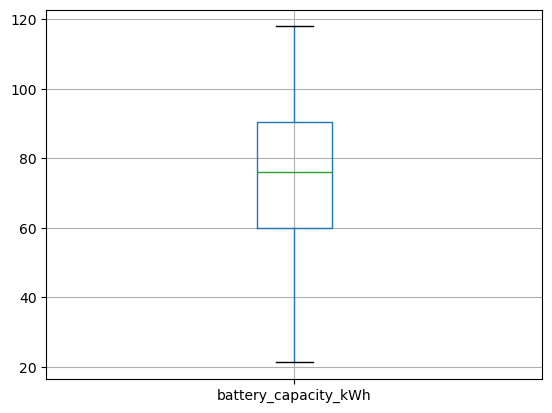

In [297]:
df.boxplot(column='battery_capacity_kWh')

3. Gráfico de Dispersión (Scatter Plot)
- Explora la relación lineal (o no lineal) entre dos variables numéricas.

<Axes: xlabel='battery_capacity_kWh', ylabel='range_km'>

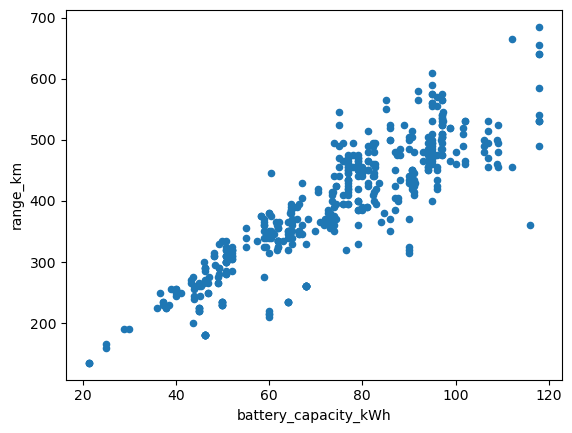

In [298]:
df.plot.scatter(x='battery_capacity_kWh', y='range_km')

4. Heatmap de Correlación 
- Visualiza de forma matricial la fuerza y el signo de las correlaciones entre todas las variables numéricas.

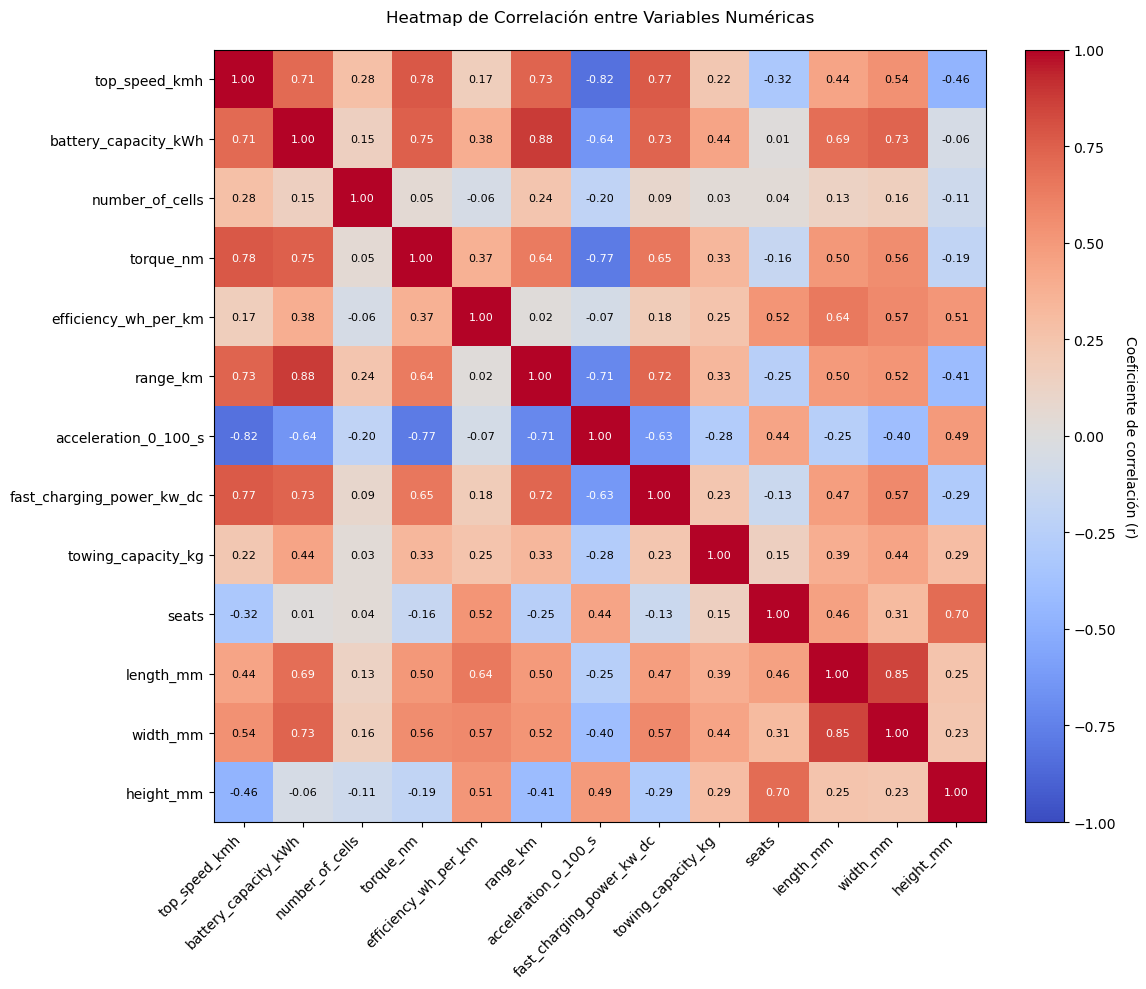

In [299]:
# 2) Calculamos la matriz de correlaciones solo de variables numéricas
corr = df.select_dtypes(include=[np.number]).corr()

# 3) Creamos la figura y el eje
fig, ax = plt.subplots(figsize=(12, 10))

# 4) Pintamos el heatmap con imshow()
im = ax.imshow(corr.values,
               cmap='coolwarm',    # paleta de color azul-rojo
               vmin=-1, vmax=1,    # rango fijo de correlación [-1, 1]
               aspect='equal')     # celdas cuadradas

# 5) Añadimos la barra de color
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Coeficiente de correlación (r)', rotation=270, labelpad=15)

# 6) Definimos las etiquetas de los ejes con los nombres de columnas
cols = corr.columns
ticks = np.arange(len(cols))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols, rotation=45, ha='right')
ax.set_yticklabels(cols)

# 7) Anotamos cada celda con el valor de correlación
for i in range(len(cols)):
    for j in range(len(cols)):
        value = corr.values[i, j]
        ax.text(j, i,
                f'{value:.2f}',
                ha='center', va='center',
                color='white' if abs(value) > 0.6 else 'black',
                fontsize=8)

# 8) Título y ajuste de layout
ax.set_title('Heatmap de Correlación entre Variables Numéricas', pad=20)
plt.tight_layout()

# 9) Mostramos el gráfico
plt.show()

5. Gráfico de Barras de Medias
- Para qué sirve: compara el valor medio de una métrica (p.ej. eficiencia) 
- 
- entre categorías (segmentos de coche).

<Axes: xlabel='segment'>

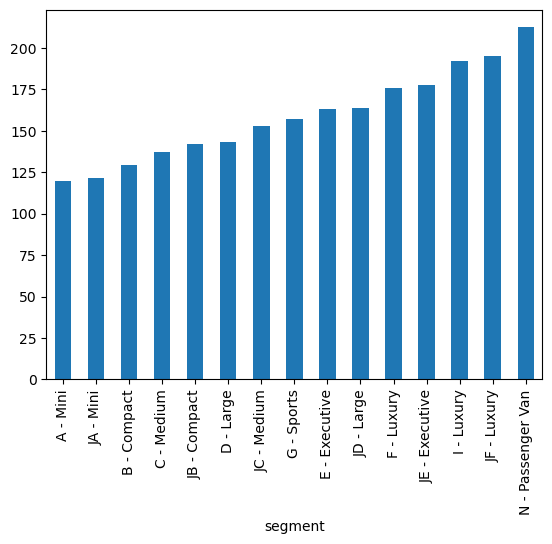

In [300]:
df.groupby('segment')['efficiency_wh_per_km'].mean().sort_values().plot.bar()

6. KDE Plot (Estimación de Densidad)
- Suaviza el histograma y te ayuda a ver picos de densidad en distribuciones continuas.

<Axes: ylabel='Density'>

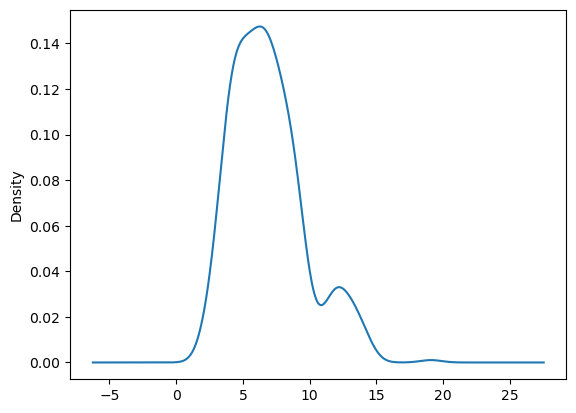

In [301]:
df['acceleration_0_100_s'].plot.kde()

7. Diagrama de Violín
- Combina boxplot y KDE, ideal para comparar distribuciones de rango según segmento.

([<matplotlib.axis.XTick at 0x242676f0980>,
 [Text(1, 0, 'B - Compact'),
  Text(2, 0, 'JB - Compact'),
  Text(3, 0, 'JC - Medium'),
  Text(4, 0, 'JE - Executive'),
  Text(5, 0, 'JD - Large'),
  Text(6, 0, 'F - Luxury'),
  Text(7, 0, 'D - Large'),
  Text(8, 0, 'E - Executive'),
  Text(9, 0, 'C - Medium'),
  Text(10, 0, 'JF - Luxury'),
  Text(11, 0, 'N - Passenger Van'),
  Text(12, 0, 'A - Mini'),
  Text(13, 0, 'JA - Mini'),
  Text(14, 0, 'G - Sports'),
  Text(15, 0, 'I - Luxury')])

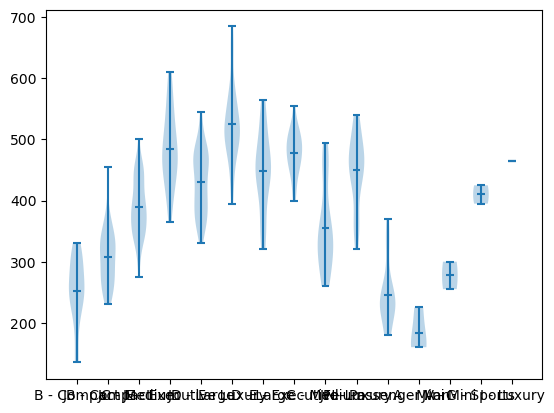

In [302]:
vals = [df[df.segment==s]['range_km'] for s in df.segment.unique()]
plt.violinplot(vals, showmeans=True)
plt.xticks(np.arange(1, len(vals)+1), df.segment.unique())


8. Gráfico de Líneas de Tendencia (si tuvieras fecha) – Qué es:
- muestra la evolución temporal de una métrica (por ejemplo, capacidad de batería media por año).

<Axes: xlabel='battery_capacity_kWh'>

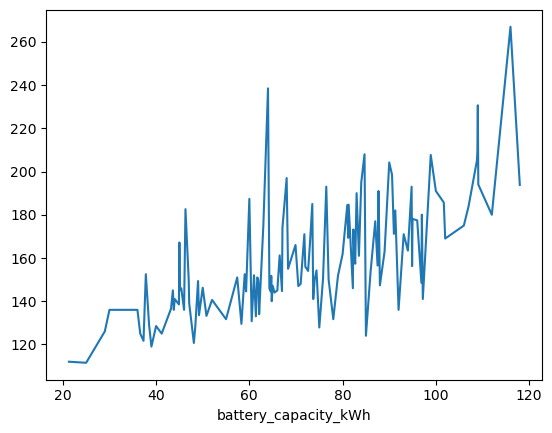

In [303]:
df.sort_values('battery_capacity_kWh').groupby('battery_capacity_kWh')['efficiency_wh_per_km'].mean().plot()

1. Dispersión “Battery vs Range”
   
    Muestra la relación directa entre la capacidad de batería (kWh) 
    
    y la autonomía (km), detectando patrones lineales o saturaciones.

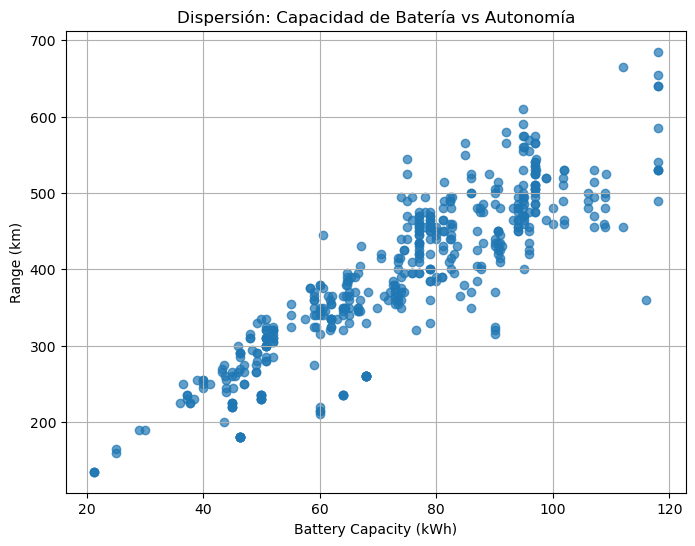

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    df['battery_capacity_kWh'],
    df['range_km'],
    alpha=0.7,
    color='tab:blue'
)
plt.title('Dispersión: Capacidad de Batería vs Autonomía')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.grid(True)
plt.show()


2. Boxplot “Range por Segmento”

    Compara la distribución de la autonomía agrupada por segmento de vehículo (
        
    compacto, SUV, ejecutivo), revelando medianas, cuartiles y outliers.

C:\Users\Dell\AppData\Local\Temp\ipykernel_956\1978847980.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=segments)


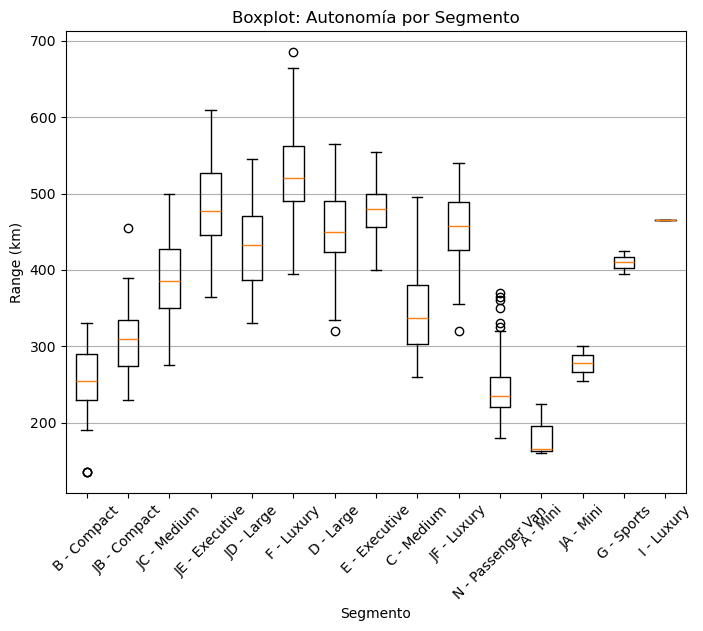

In [305]:
# Preparamos los datos por segmento
segments = df['segment'].unique()
data = [df[df['segment']==seg]['range_km'] for seg in segments]

# Boxplot
plt.figure(figsize=(8,6))
plt.boxplot(data, labels=segments)
plt.title('Boxplot: Autonomía por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Range (km)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


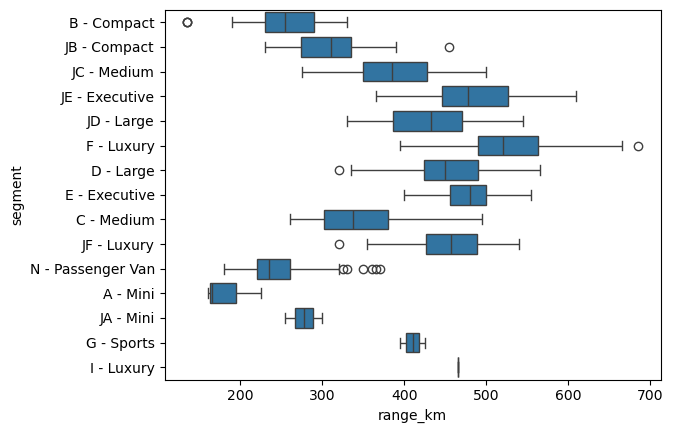

In [306]:
sns.boxplot(x=df['range_km'], y=df['segment'], orient="y");

3. Violin Plot “Efficiency por Car Body Type”

    Combina densidad y boxplot para comparar la eficiencia (Wh/km) 
    
    según el tipo de carrocería (hatchback, SUV, sedán).

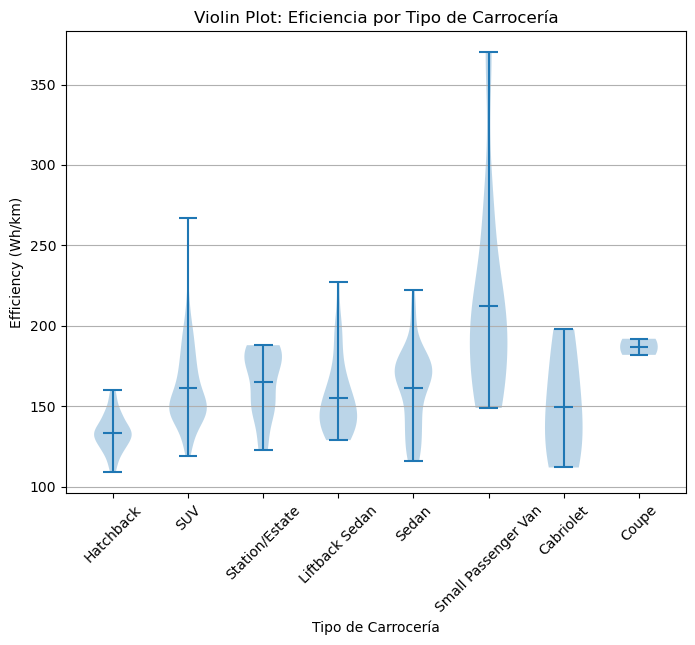

In [307]:
# Agrupamos por tipo de carrocería
types = df['car_body_type'].unique()
data = [df[df['car_body_type']==t]['efficiency_wh_per_km'] for t in types]

# Violin plot
plt.figure(figsize=(8,6))
plt.violinplot(data, showmeans=True)
plt.title('Violin Plot: Eficiencia por Tipo de Carrocería')
plt.xlabel('Tipo de Carrocería')
plt.ylabel('Efficiency (Wh/km)')
plt.xticks(np.arange(1, len(types)+1), types, rotation=45)
plt.grid(axis='y')
plt.show()


4. Barras Agrupadas “Fast Charge Power por Drivetrain y Segmento”
    
    Muestra la media de potencia de carga rápida separada por 
    
    tipo de tracción (AWD, RWD, FWD) y segmento.

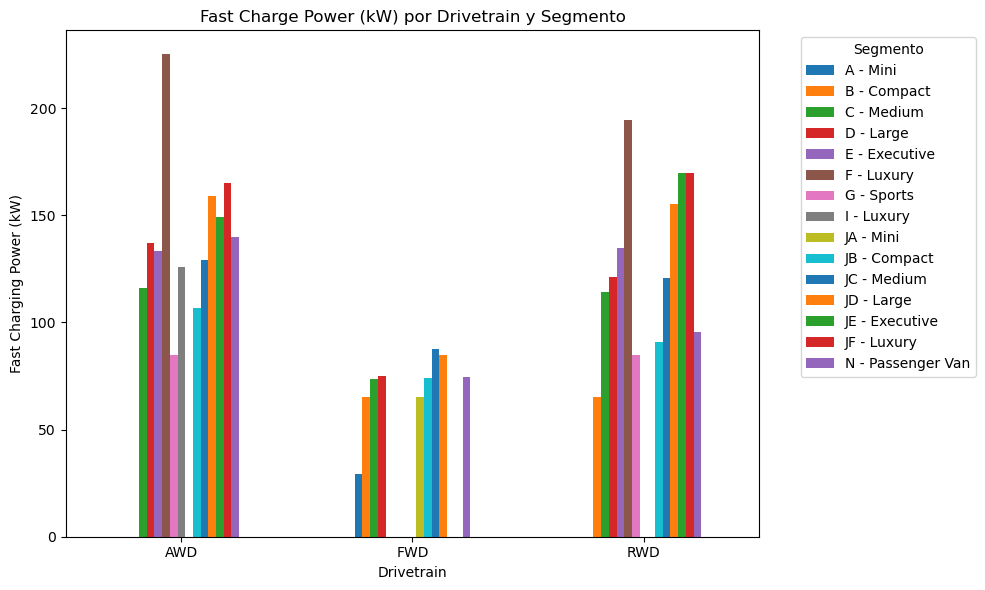

In [308]:
# Pivot table: índices = drivetrain, columnas = segment
pivot = df.pivot_table(
    index='drivetrain',
    columns='segment',
    values='fast_charging_power_kw_dc',
    aggfunc='mean'
)

# Gráfico de barras agrupadas
pivot.plot(kind='bar', figsize=(10,6))
plt.title('Fast Charge Power (kW) por Drivetrain y Segmento')
plt.xlabel('Drivetrain')
plt.ylabel('Fast Charging Power (kW)')
plt.xticks(rotation=0)
plt.legend(title='Segmento', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

5. Barras Apiladas “Número de Modelos por Brand y Segmento”

    Visualiza la distribución de marcas dentro de cada segmento, 
    
    ayudando a ver qué fabricantes dominan cada nicho.



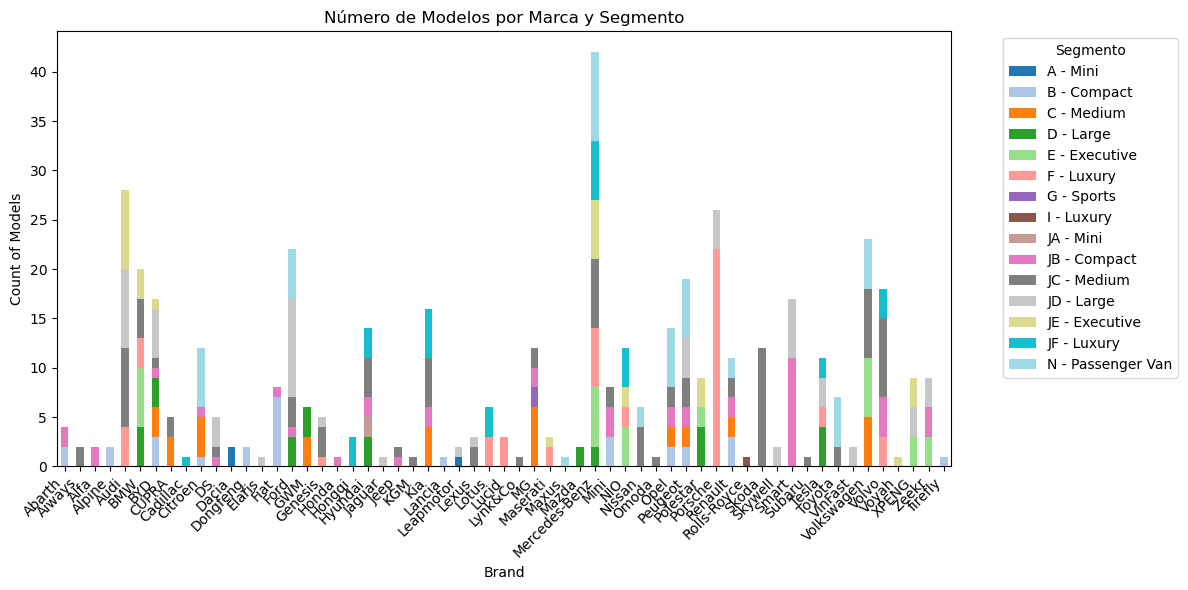

In [309]:
# Contar modelos por brand y segment
pivot = df.groupby(['brand','segment']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)
plt.title('Número de Modelos por Marca y Segmento')
plt.xlabel('Brand')
plt.ylabel('Count of Models')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segmento', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


6. Pairplot “Selección de Métricas Clave”

    Crea un grid de scatter + histogramas cruzando varias variables numéricas, 
    
    ideal para explorar interacciones múltiples.

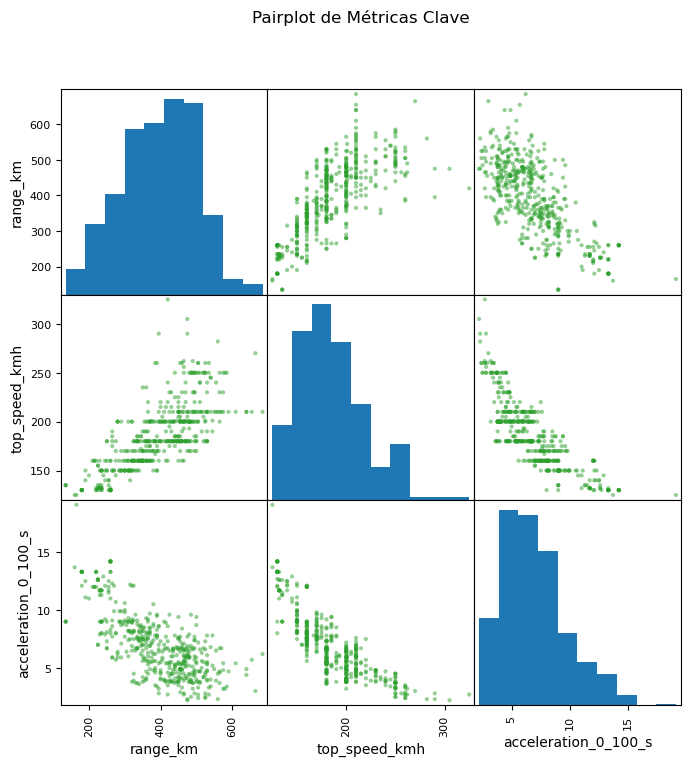

In [310]:
from pandas.plotting import scatter_matrix

# Selección de variables
vars = ['range_km', 'top_speed_kmh', 'acceleration_0_100_s']

# Scatter matrix
scatter_matrix(
    df[vars],
    figsize=(8,8),
    diagonal='hist',
    alpha=0.5,
    color='tab:green'
)
plt.suptitle('Pairplot de Métricas Clave')
plt.show()

7. Bubble Chart “Range vs Top Speed (tamaño = Battery Capacity)”

    Añade una dimensión extra (tamaño) a la dispersión, 
    
    permitiendo ver autonomía, velocidad y tamaño de batería a la vez.

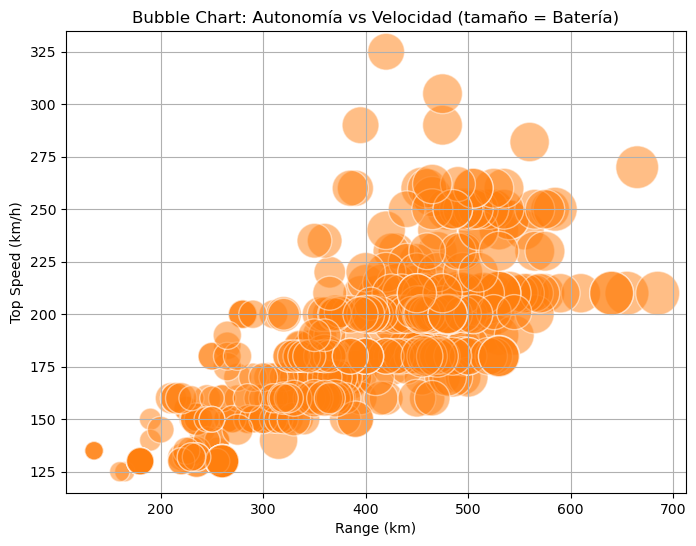

In [311]:
# Calculamos tamaño de burbuja
sizes = df['battery_capacity_kWh'] / df['battery_capacity_kWh'].max() * 1000

# Bubble chart
plt.figure(figsize=(8,6))
plt.scatter(
    df['range_km'],
    df['top_speed_kmh'],
    s=sizes,
    alpha=0.5,
    color='tab:orange',
    edgecolors='w'
)
plt.title('Bubble Chart: Autonomía vs Velocidad (tamaño = Batería)')
plt.xlabel('Range (km)')
plt.ylabel('Top Speed (km/h)')
plt.grid(True)
plt.show()


8. 100% Barras Apiladas “Fast Charge Port por Segmento”

    (aproximación al mosaic plot usando un 100% stacked bar)

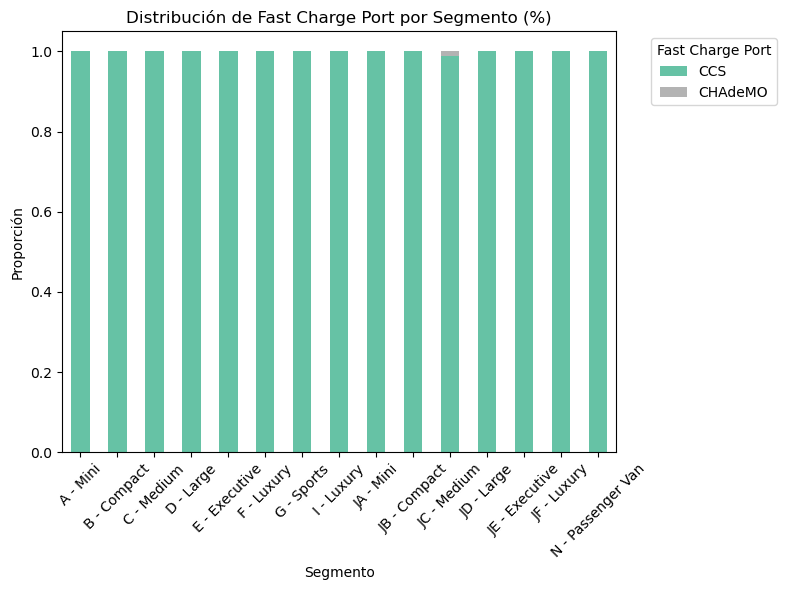

In [312]:

# Pivot y normalización por fila
pivot = df.groupby(['segment','fast_charge_port']).size().unstack(fill_value=0)
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

# Gráfico 100% apilado
pivot_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    colormap='Set2'
)
plt.title('Distribución de Fast Charge Port por Segmento (%)')
plt.xlabel('Segmento')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.legend(
    title='Fast Charge Port',
    bbox_to_anchor=(1.05,1),
    loc='upper left'
)
plt.tight_layout()
plt.show()


10. Parallel Coordinates “Perfil Multidimensional de Modelos”

    Traza cada modelo a través de varias métricas normalizadas, 
    
    facilitando la comparación global de prestaciones.

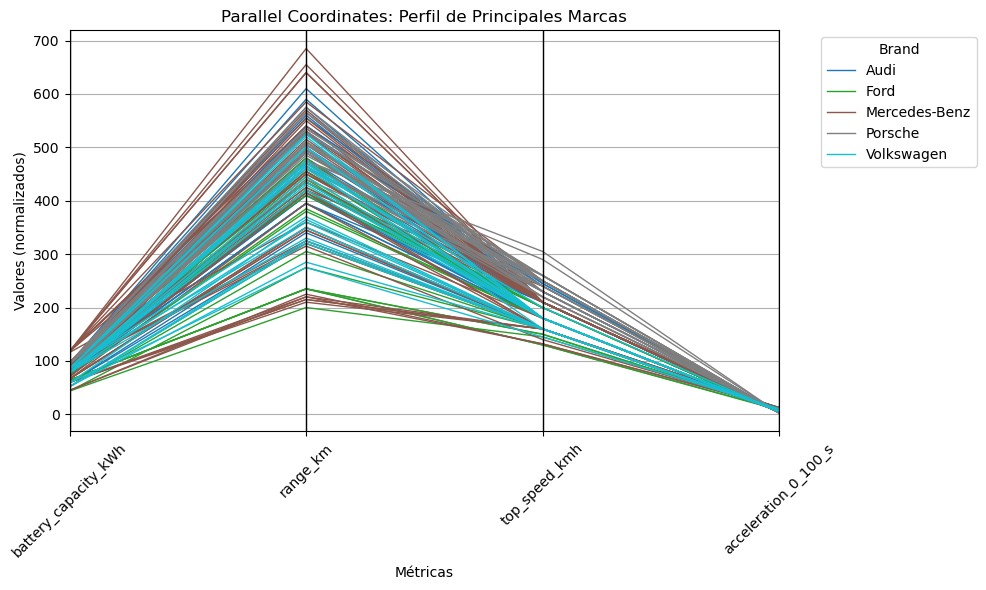

In [313]:
from pandas.plotting import parallel_coordinates

# Elegimos las 5 marcas más frecuentes para no saturar el gráfico
top_brands = df['brand'].value_counts().nlargest(5).index
df_sub = df[df['brand'].isin(top_brands)]

# Columnas a graficar
cols = ['battery_capacity_kWh','range_km','top_speed_kmh','acceleration_0_100_s']

# Parallel coordinates
plt.figure(figsize=(10,6))
parallel_coordinates(
    df_sub[['brand'] + cols],
    'brand',
    colormap=plt.get_cmap('tab10'),
    linewidth=1
)
plt.title('Parallel Coordinates: Perfil de Principales Marcas')
plt.xlabel('Métricas')
plt.ylabel('Valores (normalizados)')
plt.xticks(rotation=45)
plt.legend(
    title='Brand',
    bbox_to_anchor=(1.05,1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

## Diagrama de dispersión

In [314]:
df_num = df[df.describe().columns]

In [315]:
df.describe().columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')

In [316]:
df_num.dropna().columns

Index(['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm'],
      dtype='object')

In [317]:
variables_correladas = ['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm',
       'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s',
       'fast_charging_power_kw_dc', 'towing_capacity_kg', 'seats', 'length_mm',
       'width_mm', 'height_mm']

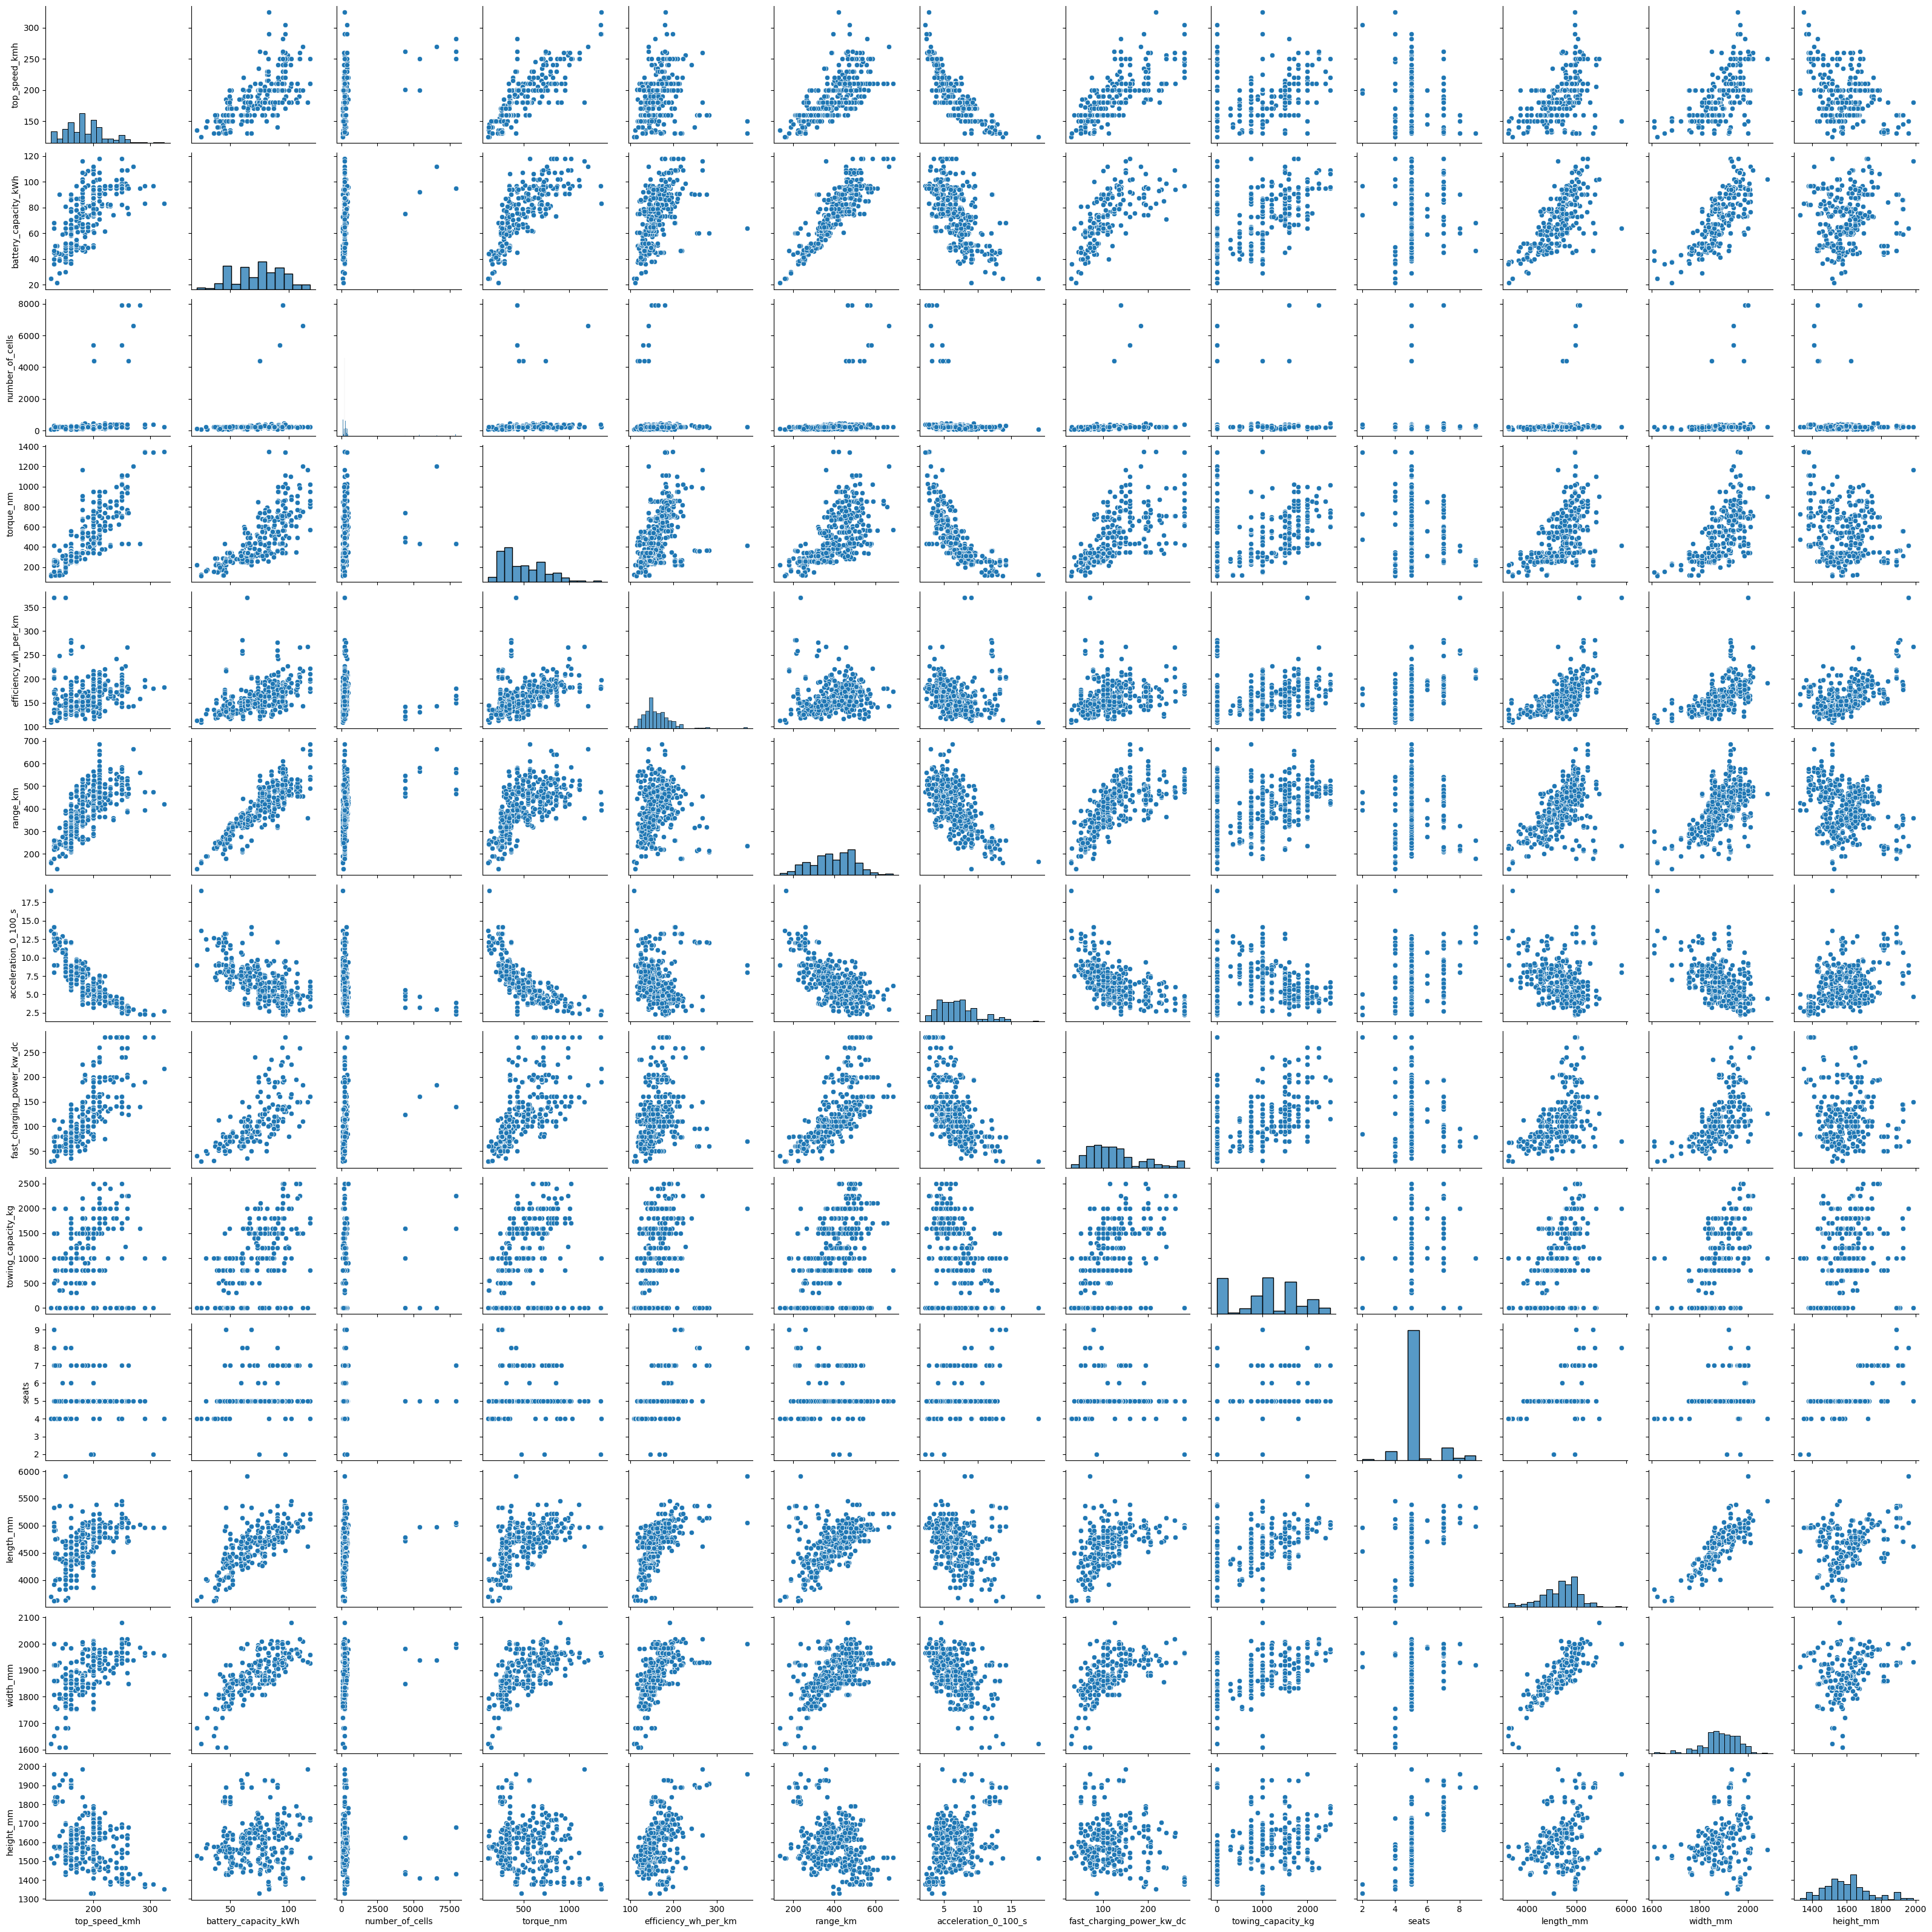

In [318]:
import seaborn as sns
datoscomp=df_num.dropna()[variables_correladas]
sns.pairplot(datoscomp);

In [319]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

# CUAL ES EL peor CARRO Y EL MEJOR CARRO ELECTRICO

## 🔍 Análisis de Autonomía, Eficiencia, Rendimiento, Carga Rápida y Dimensiones

📊 Variables:

range_km → Autonomía

efficiency_wh_per_km → Eficiencia energética

acceleration_0_100_s → Aceleración

torque_nm → Torque

fast_charging_power_kw_dc → Potencia de carga rápida

battery_capacity_kWh → Capacidad de batería

seats → Número de asientos

length_mm, width_mm, height_mm → Dimensiones

✅ Análisis:

Autonomía y eficiencia: Marcas con alta autonomía y bajo consumo energético son mejores.

Rendimiento: Marcas con baja aceleración (segundos) y alto torque (Nm) ofrecen mejor desempeño.

Carga rápida: Marcas con baterías grandes y alta potencia de carga rápida son más avanzadas.

Dimensiones y comodidad: Marcas con más asientos y dimensiones adecuadas ofrecen mejor confort.

## 🔍 Cómo analizarlo:

Calcular el promedio de cada métrica por marca.

Ordenar las marcas para identificar las mejores y peores en cada categoría.

Asignar un puntaje basado en el desempeño en cada métrica.

In [320]:
# Calcular el promedio de cada métrica por marca
brand_analysis = df.groupby('brand').agg({
    'range_km': 'mean',  # Promedio de autonomía
    'efficiency_wh_per_km': 'mean',  # Promedio de eficiencia energética
    'acceleration_0_100_s': 'mean',  # Promedio de aceleración (menor es mejor)
    'torque_nm': 'mean',  # Promedio de torque (mayor es mejor)
    'fast_charging_power_kw_dc': 'mean',  # Promedio de carga rápida
    'battery_capacity_kWh': 'mean',  # Promedio de capacidad de batería
    'seats': 'mean',  # Promedio de número de asientos
    'length_mm': 'mean',  # Promedio de longitud
    'width_mm': 'mean',  # Promedio de ancho
    'height_mm': 'mean'  # Promedio de altura
})

# Ordenar por cada métrica
best_autonomy = brand_analysis.sort_values(by='range_km', ascending=False)
best_efficiency = brand_analysis.sort_values(by='efficiency_wh_per_km', ascending=True)
best_acceleration = brand_analysis.sort_values(by='acceleration_0_100_s', ascending=True)
best_torque = brand_analysis.sort_values(by='torque_nm', ascending=False)
best_charging = brand_analysis.sort_values(by='fast_charging_power_kw_dc', ascending=False)
best_battery = brand_analysis.sort_values(by='battery_capacity_kWh', ascending=False)
best_comfort = brand_analysis.sort_values(by='seats', ascending=False)



In [321]:
# Mostrar las mejores y peores marcas en cada categoría
print("\n🔝 Mejores marcas por autonomía:\n", best_autonomy.head(5))
# print("\n🔻 Peores marcas por autonomía:\n", best_autonomy.tail(10))

# print("\n🔝 Mejores marcas por eficiencia energética:\n", best_efficiency.head(10))
# print("\n🔻 Peores marcas por eficiencia energética:\n", best_efficiency.tail(10))

# print("\n🔝 Mejores marcas por aceleración:\n", best_acceleration.head(10))
# print("\n🔻 Peores marcas por aceleración:\n", best_acceleration.tail(10))

# print("\n🔝 Mejores marcas por torque:\n", best_torque.head(10))
# print("\n🔻 Peores marcas por torque:\n", best_torque.tail(10))

# print("\n🔝 Mejores marcas por carga rápida:\n", best_charging.head(10))
# print("\n🔻 Peores marcas por carga rápida:\n", best_charging.tail(10))

# print("\n🔝 Mejores marcas por capacidad de batería:\n", best_battery.head(10))
# print("\n🔻 Peores marcas por capacidad de batería:\n", best_battery.tail(10))

# print("\n🔝 Mejores marcas por comodidad (asientos):\n", best_comfort.head(10))
# print("\n🔻 Peores marcas por comodidad (asientos):\n", best_comfort.tail(10))


🔝 Mejores marcas por autonomía:
            range_km  efficiency_wh_per_km  acceleration_0_100_s   torque_nm  \
brand                                                                         
Lucid    603.333333            138.333333              3.633333  686.666667   
Porsche  502.884615            179.615385              3.715385  785.730769   
Tesla    490.000000            138.272727              4.300000  471.545455   
Lotus    489.166667            219.166667              3.850000  801.666667   
Voyah    480.000000            200.000000              4.400000  720.000000   

         fast_charging_power_kw_dc  battery_capacity_kWh     seats  \
brand                                                                
Lucid                   168.000000             98.666667  5.000000   
Porsche                 252.000000             93.865385  4.884615   
Tesla                   127.272727             79.636364  5.363636   
Lotus                   249.500000            103.950000  5.00

In [322]:
df["brand"].describe()

count               478
unique               59
top       Mercedes-Benz
freq                 42
Name: brand, dtype: object

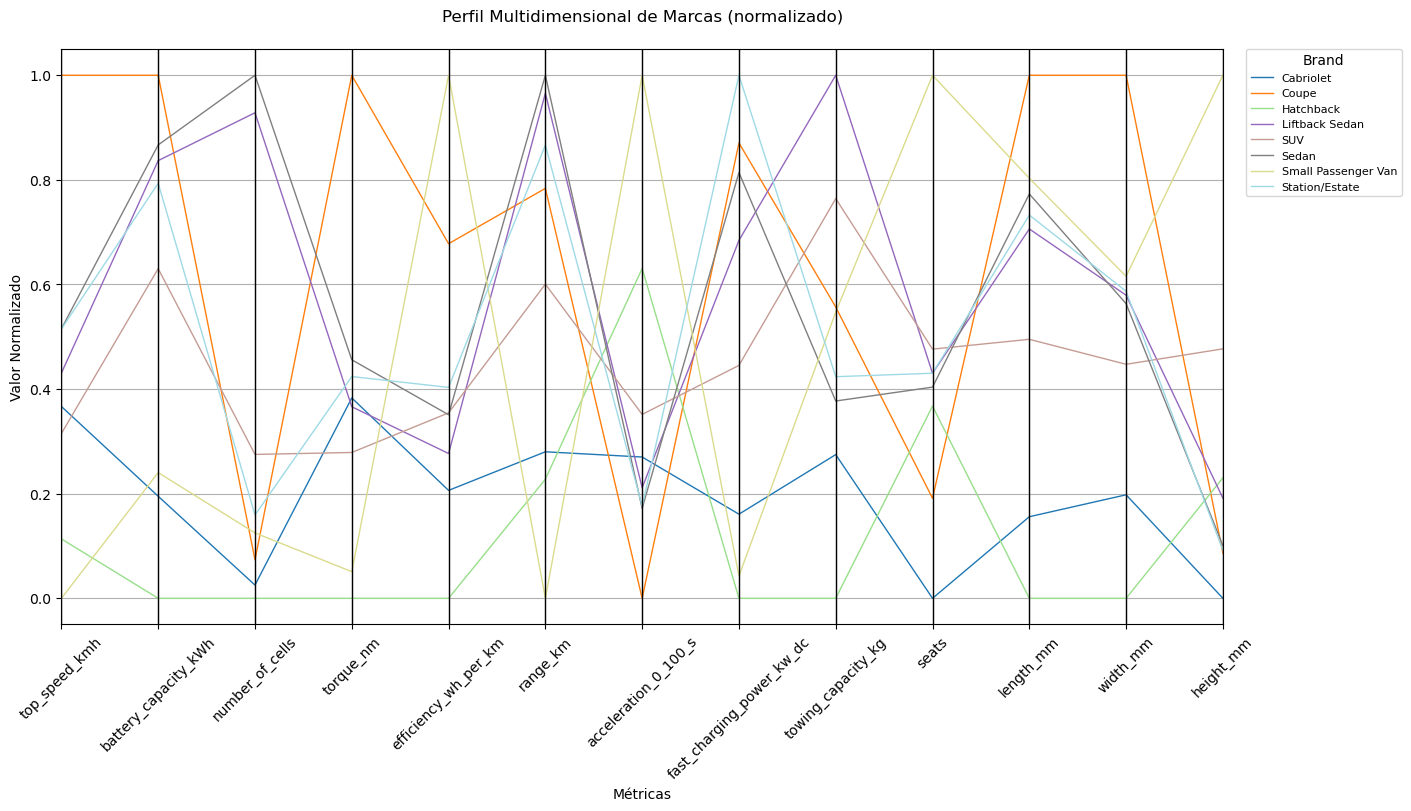

In [323]:
from pandas.plotting import parallel_coordinates

# 2) Selecciona SOLO columnas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 3) Agrupa por marca y calcula la media de esas numéricas
brand_stats = df.groupby('car_body_type')[num_cols].mean().reset_index()

# 4) Normaliza cada métrica en [0–1]
brand_stats[num_cols] = (
    brand_stats[num_cols] - brand_stats[num_cols].min()
) / (
    brand_stats[num_cols].max() - brand_stats[num_cols].min()
)

# 5) Dibuja Parallel Coordinates sin problema de márgenes
fig, ax = plt.subplots(figsize=(14, 8), constrained_layout=True)

parallel_coordinates(
    brand_stats,
    class_column='car_body_type',
    cols=num_cols,
    ax=ax,
    colormap=plt.get_cmap('tab20'),
    linewidth=1
)

ax.set_title('Perfil Multidimensional de Marcas (normalizado)', pad=20)
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor Normalizado')
ax.tick_params(axis='x', labelrotation=45)

# Mueve la leyenda fuera del plot
ax.legend(
    title='Brand',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=8,
    borderaxespad=0.
)

plt.show()

1. 🔵 Scatter Plot
Variables: range_km vs. efficiency_wh_per_km

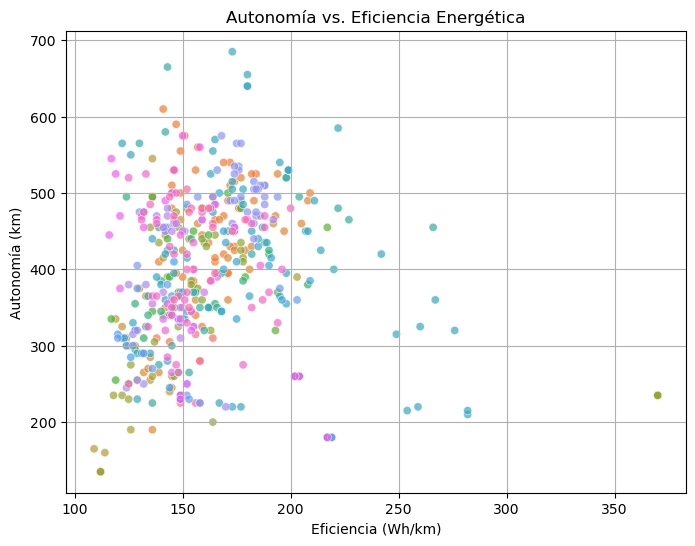

In [324]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='efficiency_wh_per_km',
    y='range_km',
    hue='brand',
    legend=False,
    alpha=0.7
)
plt.title("Autonomía vs. Eficiencia Energética")
plt.xlabel("Eficiencia (Wh/km)")
plt.ylabel("Autonomía (km)")
plt.grid(True)
plt.show()


2. 📊 Bar Chart
Promedio de autonomía (range_km) por marca


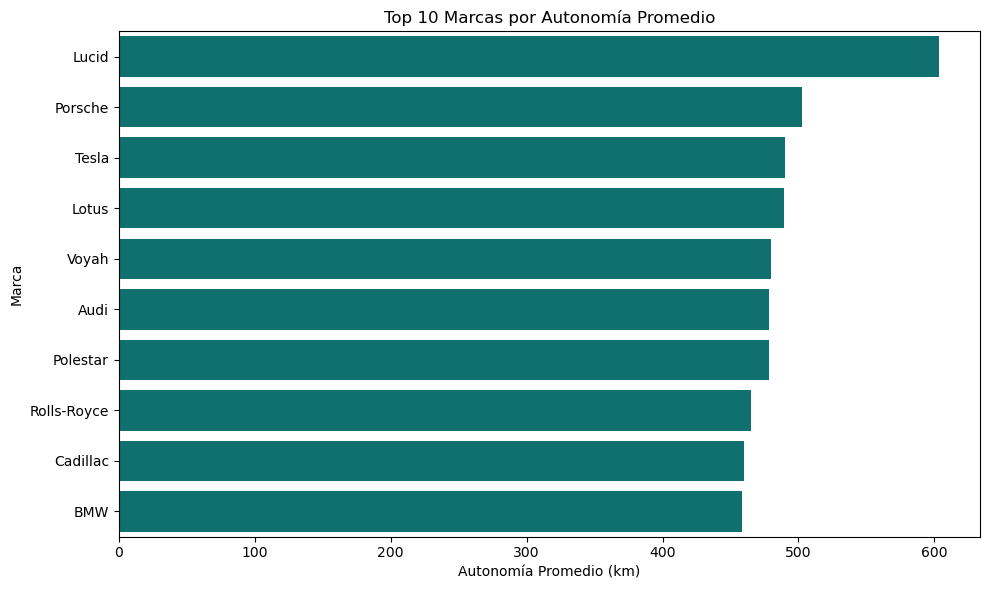

In [325]:

brand_stats = (
    df
    .groupby('brand', as_index=False)
    .mean(numeric_only=True)  # <- ignora columnas object
)

top10 = brand_stats.nlargest(10, 'range_km')

plt.figure(figsize=(10,6))
top10 = brand_stats.nlargest(10, 'range_km')

sns.barplot(
    data=top10,
    x='range_km',
    y='brand',
    color='teal',       # color fijo en lugar de palette
)
plt.title("Top 10 Marcas por Autonomía Promedio")
plt.xlabel("Autonomía Promedio (km)")
plt.ylabel("Marca")
plt.tight_layout()
plt.show()



3. 📦 Box Plot
Distribución de range_km por marca (solo top 8 brands)

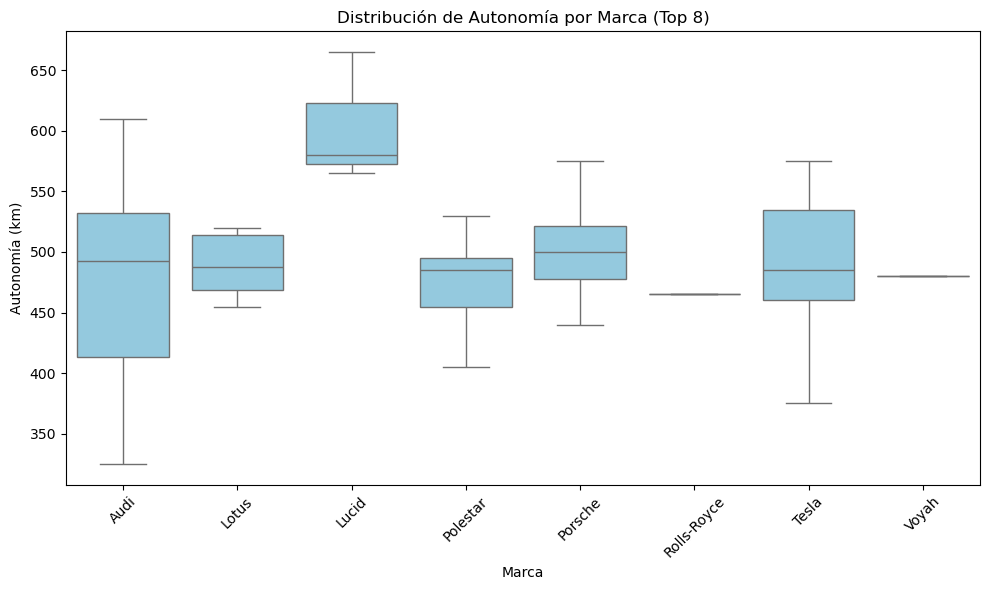

In [326]:
plt.figure(figsize=(10,6))
top8_brands = brand_stats.nlargest(8, 'range_km')['brand']

sns.boxplot(
    data=df[df['brand'].isin(top8_brands)],
    x='brand',
    y='range_km',
    color="skyblue"        # color único en lugar de palette
)

plt.title("Distribución de Autonomía por Marca (Top 8)")
plt.xlabel("Marca")
plt.ylabel("Autonomía (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. 🌡️ Heatmap de Correlación
Todas las variables numéricas

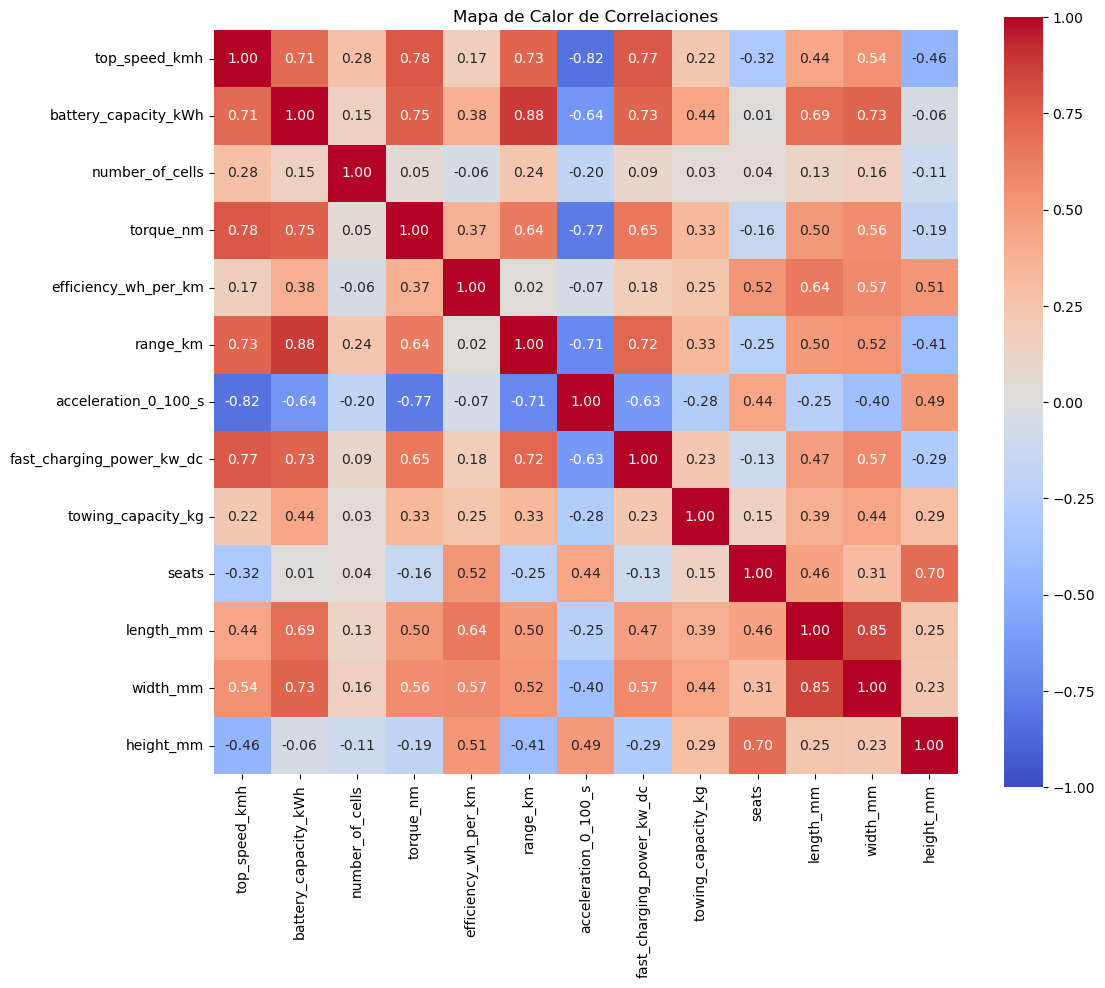

In [327]:
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True
)
plt.title("Mapa de Calor de Correlaciones")
plt.show()


5. 🕸️ Parallel Coordinates
Perfil completo de las variables para 5 marcas

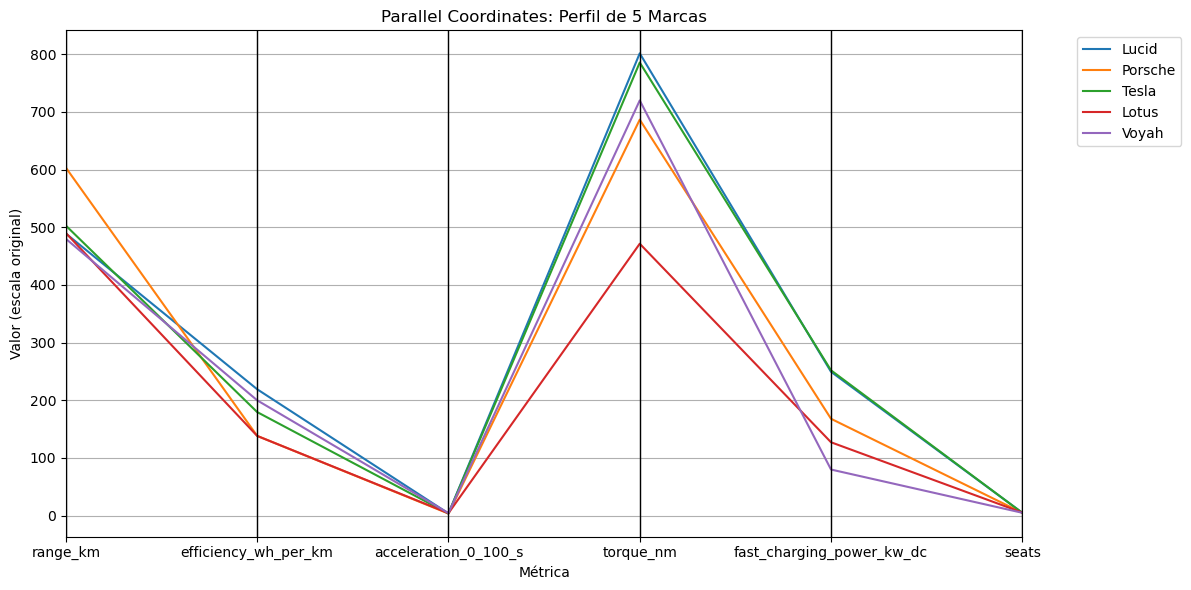

In [328]:
# 1) Selecciona las 5 marcas con mayor autonomía
sample_brands = (
    brand_stats
    .nlargest(5, 'range_km')['brand']
    .tolist()
)

# 2) Filtra y trae la columna 'brand' como columna, no índice
pc_df = (
    brand_stats[brand_stats['brand'].isin(sample_brands)]
    .reset_index(drop=True)   # Si 'brand' era índice; o elimina .reset_index() si ya estaba como columna
)

# 3) Define las métricas que vas a trazar
metrics = [
    'range_km',
    'efficiency_wh_per_km',
    'acceleration_0_100_s',
    'torque_nm',
    'fast_charging_power_kw_dc',
    'seats'
]

# 4) Dibuja el gráfico de Parallel Coordinates
plt.figure(figsize=(12,6))
parallel_coordinates(
    pc_df,                 # DataFrame con 'brand' como columna
    class_column='brand',  # Nombre de la columna que agrupa
    cols=metrics,          # Sólo graficamos estas métricas
    color=sns.color_palette("tab10", len(sample_brands))
)
plt.title("Parallel Coordinates: Perfil de 5 Marcas")
plt.xlabel("Métrica")
plt.ylabel("Valor (escala original)")
plt.legend(sample_brands, bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


6. 🕷️ Radar/Spider Chart
Comparación de 3 marcas en 5 métricas

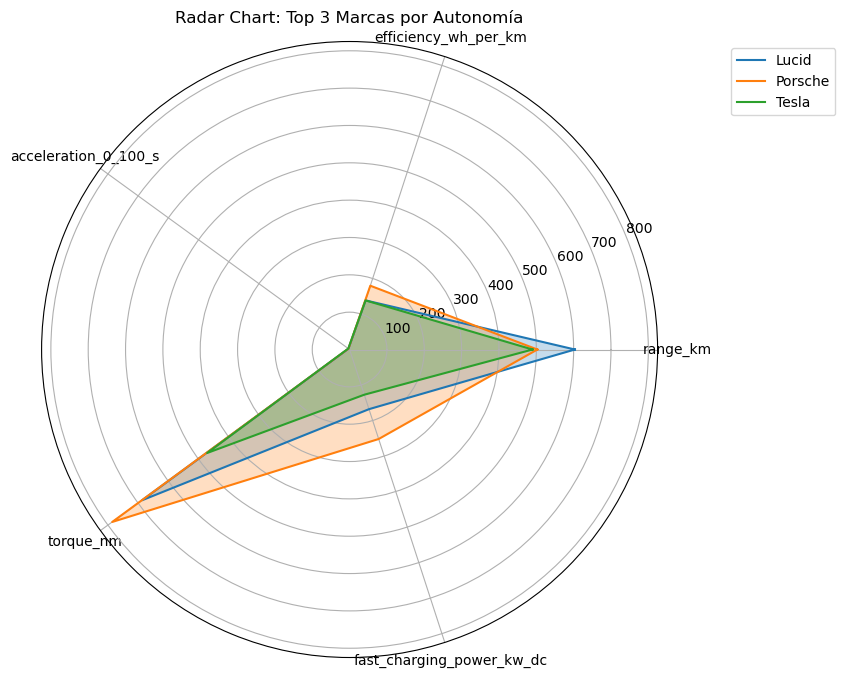

In [329]:
import numpy as np

metrics = ['range_km','efficiency_wh_per_km','acceleration_0_100_s','torque_nm','fast_charging_power_kw_dc']
brands = brand_stats.nlargest(3, 'range_km')['brand']
values = brand_stats.set_index('brand').loc[brands, metrics].values

# Ángulos para el radar
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(8,8))
for idx, brand in enumerate(brands):
    vals = values[idx].tolist()
    vals += vals[:1]
    ax.plot(angles, vals, label=brand)
    ax.fill(angles, vals, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_title("Radar Chart: Top 3 Marcas por Autonomía")
ax.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.show()


7. 🔵🟢 Bubble Chart
range_km vs. efficiency_wh_per_km, tamaño = battery_capacity_kWh

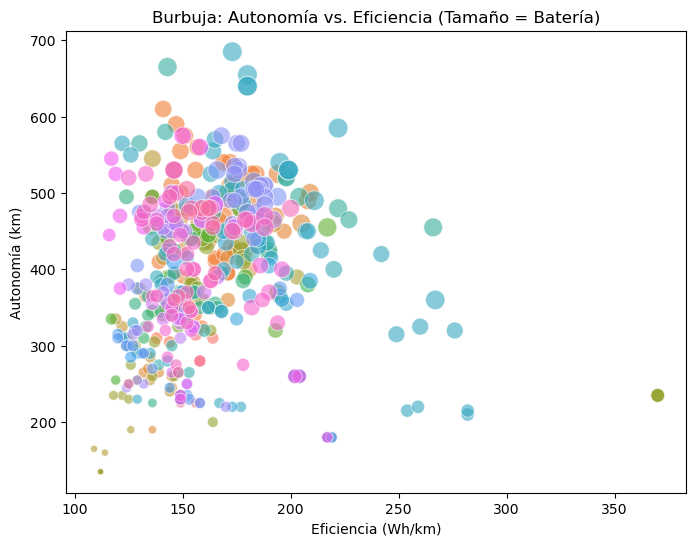

In [330]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='efficiency_wh_per_km',
    y='range_km',
    size='battery_capacity_kWh',
    hue='brand',
    alpha=0.6,
    sizes=(20,200)
)
plt.title("Burbuja: Autonomía vs. Eficiencia (Tamaño = Batería)")
plt.xlabel("Eficiencia (Wh/km)")
plt.ylabel("Autonomía (km)")
plt.legend([],[], frameon=False)  # Quita leyenda de marcas muy larga
plt.show()


8. 📑 Pairplot
Exploración de todas las relaciones bivariadas

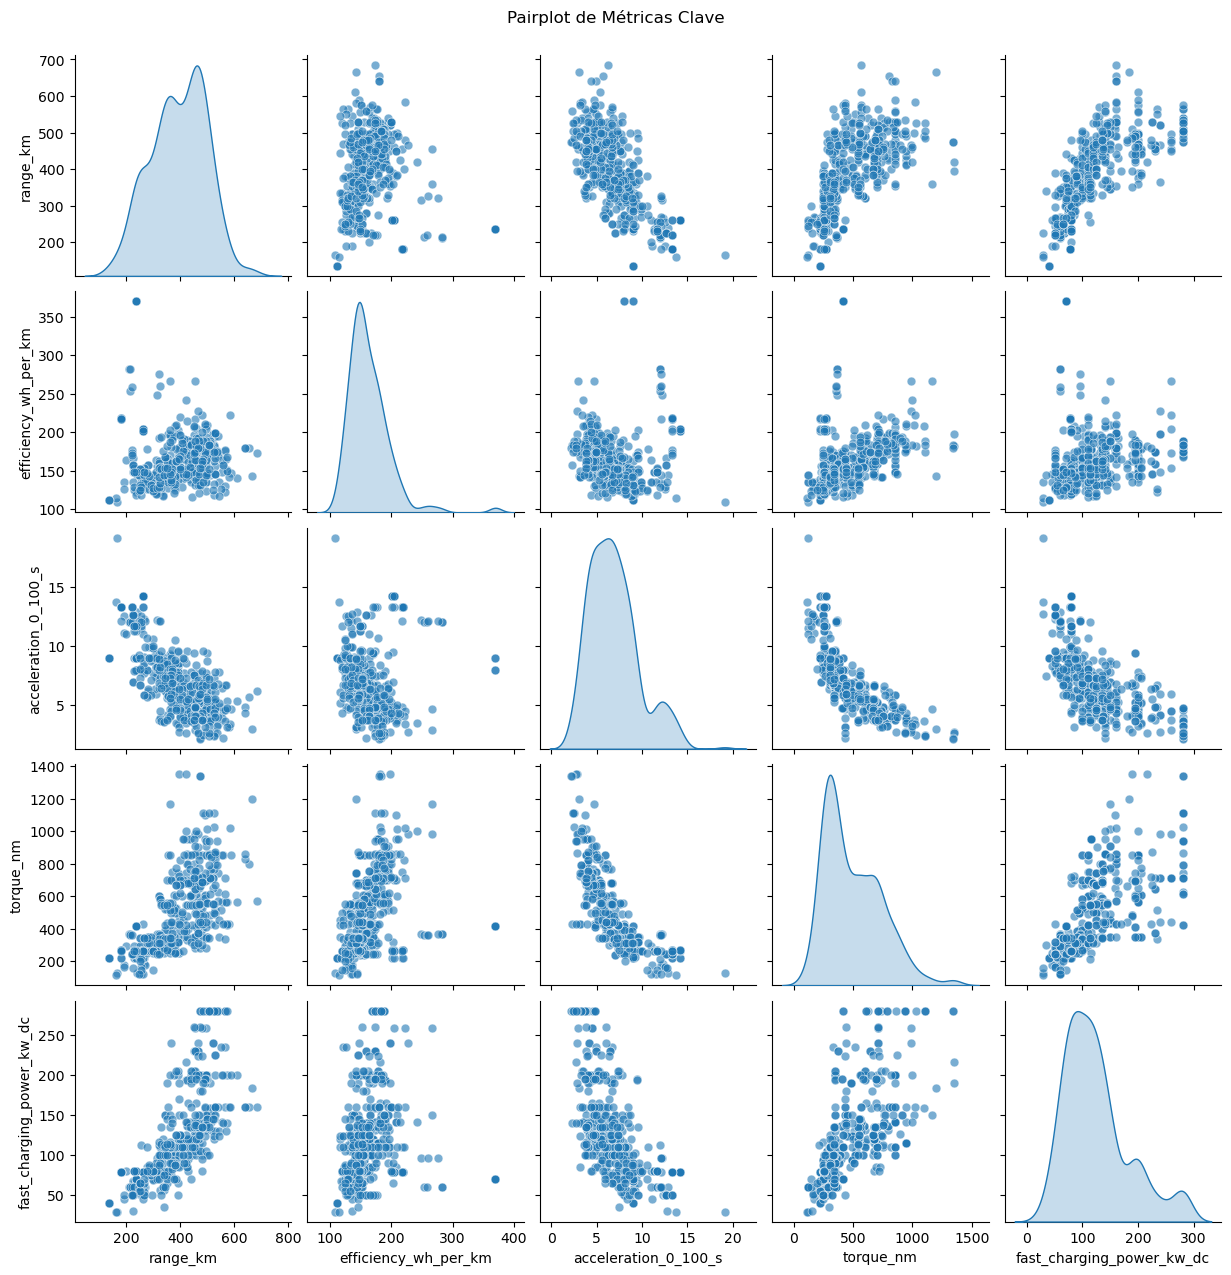

In [331]:
sns.pairplot(
    df[
        ['range_km','efficiency_wh_per_km','acceleration_0_100_s',
         'torque_nm','fast_charging_power_kw_dc']
    ],
    diag_kind='kde',
    plot_kws={'alpha':0.6, 's':40}
)
plt.suptitle("Pairplot de Métricas Clave", y=1.02)
plt.show()


ValueError: Could not interpret value `segment_group` for `y`. An entry with this name does not appear in `data`.

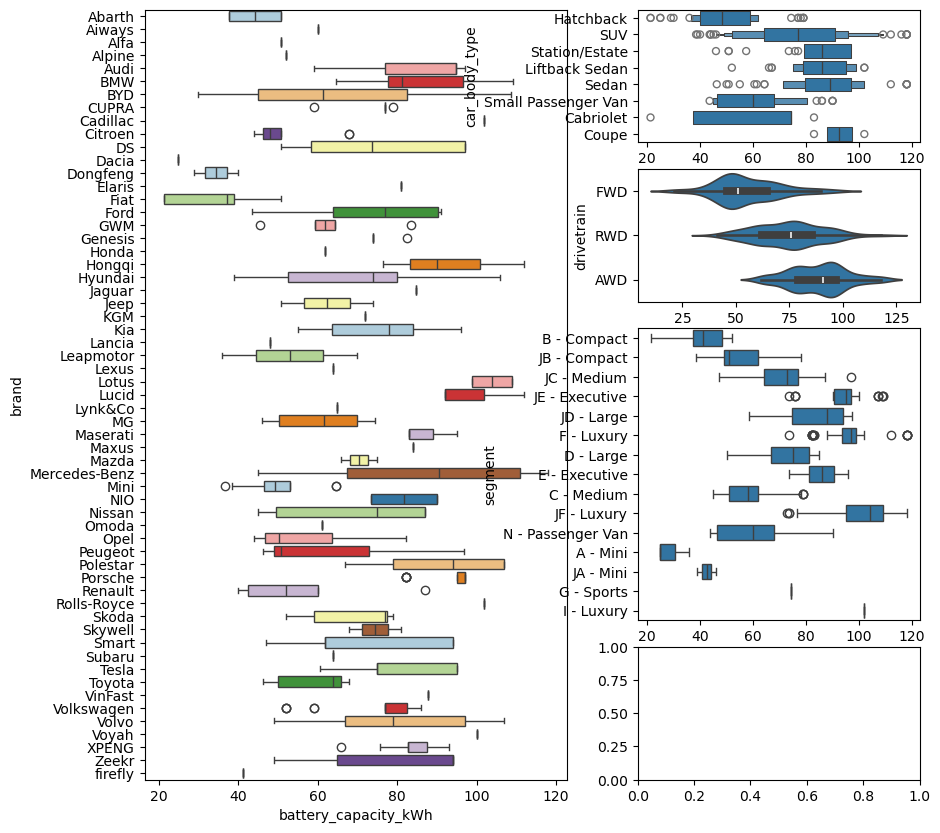

In [336]:
from matplotlib.gridspec import GridSpec

def DistributionPlotter(num_feature):
    # Create the figure and GridSpec layout
    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(5, 2, width_ratios=[3, 2])
    
    # First plot:
    ax0 = fig.add_subplot(gs[:, 0])
    ax0 = sns.boxplot(df, x=num_feature, y='brand', palette='Paired')
    
    # Second plot: 
    ax1 = fig.add_subplot(gs[0, 1])
    ax1 = sns.boxenplot(df, x=num_feature, y='car_body_type')
    ax1.set_xlabel('')
    
    # Third plot: 
    ax2 = fig.add_subplot(gs[1, 1])
    ax2 = sns.violinplot(df, x=num_feature, y='drivetrain')
    ax2.set_xlabel('')
    
    # fourth plot:
    ax3 = fig.add_subplot(gs[2:4, 1])
    ax3 = sns.boxplot(df, x=num_feature, y='segment')
    ax3.set_xlabel('')

    # fifth plot:
    ax4 = fig.add_subplot(gs[4:, 1])
    ax4 = sns.boxplot(df, x=num_feature, y='segment_group')
    
    plt.suptitle(f'{num_feature} distributions', color='gold', fontsize=14)
    plt.tight_layout()
    plt.show()

DistributionPlotter('battery_capacity_kWh')